CSE3020 - J Component
#**Data Visualization**
Sharon Shibu George - **20BCE1033** | Yashvardhan Gupta - **20BCE1289**

##Description


The Education Analysis project aims to analyze the current state of education in India by gathering and visualizing data on school conditions and facilities, socio-economic factors, and other environmental factors that impact the literacy rate and educational outcomes in the country. The project utilizes various Python libraries to create a range of data visualizations, including charts, graphs, and maps.


The project begins by collecting data on a range of factors that influence education outcomes in India, including school funding, teacher-student ratios, infrastructure quality, and community resources. The project also takes into account socio-economic factors such as poverty rates, access to healthcare, and employment opportunities.


Using this data, the project creates a series of visualizations that help to highlight the major factors that impact the growth or decline of the literacy rate in India. These visualizations might include maps that show the distribution of educational resources across the country, charts that demonstrate the correlation between poverty rates and educational outcomes, or graphs that show the impact of government policies on school funding and infrastructure.


Ultimately, the goal of the Education Analysis project is to provide policymakers, educators, and the public with insights into the major factors that impact education outcomes in India, as well as recommendations for how these factors can be addressed. By providing clear and compelling data visualizations, the project aims to make this information accessible and actionable for a wide range of stakeholders, with the ultimate goal of improving education outcomes and increasing literacy rates in India.

##Coding and Visualization

###Mounting the Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Importing the Libraries

In [ ]:
import numpy as np 
import pandas as pd 
import os
print(os.listdir("/content/drive/MyDrive/DV"))


['GLOB.csv', '.ipynb_checkpoints', 'india-statewise-2013-2016.csv']


###Exploring the Dataset - **Global**
Years of Education across the globe

####Table Exploration

In [ ]:
#https://www.kaggle.com/datasets/sdorius/globses/code
glob = pd.read_csv("/content/drive/MyDrive/DV/GLOB.csv", encoding='latin-1')

In [ ]:
glob.head()

,unid,wbid,country,year,SES,gdppc,yrseduc,popshare
0,4,AFG,Afghanistan,1970,3.474212,709.00000,NaN,0.003097
1,4,AFG,Afghanistan,1920,26.968016,731.75677,NaN,0.003245
2,4,AFG,Afghanistan,1990,1.269530,604.00000,NaN,0.002347
3,4,AFG,Afghanistan,1960,15.763076,739.00000,NaN,0.003039
4,4,AFG,Afghanistan,2000,2.061114,565.00000,NaN,0.003309


In [ ]:
!pip install geopandas

This code will show the country, year and it's respective Social-Economic Status Score, GDP and the mean number of education years.

In [ ]:
#import geopandas as gpd
#globgpd = gpd.read_file("/content/drive/MyDrive/DV/GLOB.csv")

#globgpd.plot(figsize=(10,6))

import folium
import geopandas

# The URL we will read our data from
url = "/content/drive/MyDrive/DV/GLOB.csv"
# read_html returns a list of tables from the URL
tables = pd.read_csv(url, encoding='latin-1')

table = pd.DataFrame(tables)
table = table[table['year']==2010]
table



,unid,wbid,country,year,SES,gdppc,yrseduc,popshare
5,4,AFG,Afghanistan,2010,5.676400,1662.8035,NaN,0.004150
14,24,AGO,Angola,2010,21.247763,6492.1768,2.7900,0.003149
37,8,ALB,Albania,2010,74.860367,9927.1758,NaN,0.000432
49,784,ARE,United Arab Emirates,2010,89.092285,57406.7380,NaN,0.001236
60,32,ARG,Argentina,2010,79.750809,18794.2700,9.3458,0.006118
...,...,...,...,...,...,...,...,...
2027,704,VNM,Vietnam,2010,38.222027,4486.2612,NaN,0.012901
2031,887,YEM,Yemen,2010,19.492294,4481.5547,NaN,0.003501
2045,710,ZAF,South Africa,2010,71.227959,12028.9340,8.5578,0.007535
2059,894,ZMB,Zambia,2010,27.127140,3263.3948,6.9532,0.002065


####GeoSpatial Plots

In [ ]:
# The data is in the first table - this changes from time to time - wikipedia is updated all the time.
#table = tables[0]
# Read the geopandas dataset
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


Now, we plot a geo world map on the basis of each country and its SES and GDP as to the mean years of education 

In [ ]:
#Depicting the yrseduc values for each country for the year 2010 (latest year from the dataset) in map

# Merge the two DataFrames together
table = world.merge(table, how="left", left_on=['name'], right_on=['country'])
# Clean data: remove rows with no data
table = table.dropna(subset=['yrseduc'])
# Create a map
my_map = folium.Map()
# Add the data
folium.Choropleth(
    geo_data=table,
    name='choropleth',
    data=table,
    columns=['country', 'yrseduc'],
    key_on='feature.properties.name',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='years of education accross the world'
).add_to(my_map)
my_map
#my_map.save('factors.html')

####Bar Plots

Using a Bar Plot to depict the mean number of years per country

<BarContainer object of 74 artists>

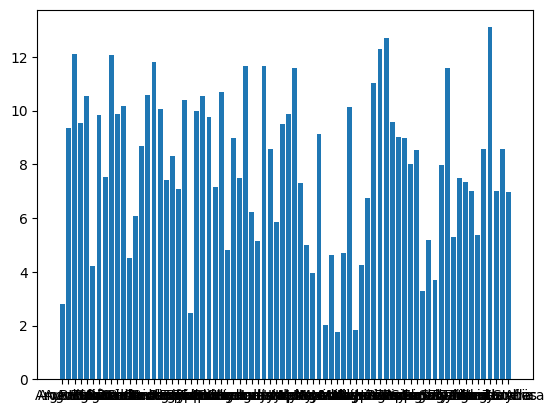

In [ ]:
#Depicting the yrseduc values for each country for the year 2010 (latest year from the dataset) using bar plot 
import matplotlib.pyplot as plt
table = pd.DataFrame(tables)
table = table[table['year']==2010]
table = table.dropna()
country = table["country"].unique()
#plt.pie(table["yrseduc"],labels = country)
plt.bar(country,table["yrseduc"])

####Correlation Coefficient

After exploring the dataset, we are now going to check the correlation between the SES and GDP vs the years of education and how much it actually does/doesn't affect each countries literacy status

In [ ]:
from scipy.stats import pearsonr


In [ ]:
# finding correlation coefficient between :
# 1) SES and yrseduc 
# 2) gdppc and yrseduc
# for each country
import matplotlib.pyplot as plt
table = pd.DataFrame(tables)
table = table.dropna()
country = table["country"].unique()
country
sescorr= []
gdpcorr= []
for x in country:
  table = pd.DataFrame(tables)
  table = table.dropna()
  table=table[table['country']==x]
  corrs, _ = pearsonr(table['SES'], table['yrseduc'])
  #print('Pearsons correlation between SES & yrseduc for country %s: %.3f' % (x,corrs))
  sescorr.append(corrs)
  corrg, _ = pearsonr(table['gdppc'], table['yrseduc'])
  gdpcorr.append(corrg)
  #print('Pearsons correlation gdppc & yrseduc for country %s: %.3f' % (x,corrg))

data = {'country': country,
        'SES': sescorr,
        'gdppc' : gdpcorr}
df = pd.DataFrame(data)
df


,country,SES,gdppc
0,Angola,0.196004,0.947220
1,Argentina,0.386843,0.915156
2,Australia,-0.197601,0.782873
3,Austria,0.225371,0.859262
4,Belgium,0.107950,0.959729
...,...,...,...
69,Uruguay,-0.700821,0.929834
70,United States,0.857645,0.906973
71,Venezuela,-0.093370,0.959712
72,South Africa,-0.031874,0.962533


####Correlation Coefficient - SES vs Years of Education (Global)

Correlation Coefficient between SES and Years of Education (Literacy)

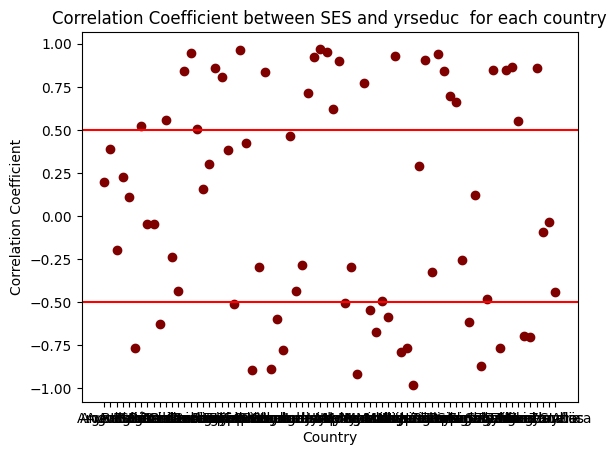

In [ ]:
#Correlation Coefficient between SES and yrseduc  for each country

plt.scatter(df["country"],df["SES"], color ='maroon')
plt.axhline(y = 0.5, color = 'r', linestyle = '-')
plt.axhline(y = -0.5, color = 'r', linestyle = '-')
plt.xlabel("Country")
plt.ylabel("Correlation Coefficient")
plt.title("Correlation Coefficient between SES and yrseduc  for each country")
plt.show()

####Correlation Coefficient - GDPPC vs Years of Education (Global)

Correlation Coefficient between GDPPC and Years of Education (Literacy)

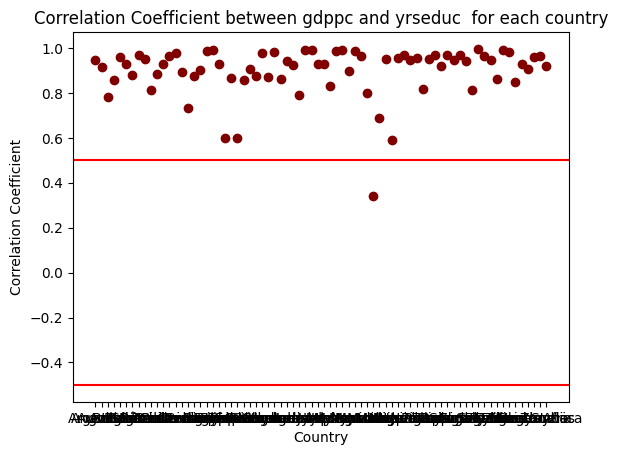

In [ ]:
#Correlation Coefficient between gdppc and yrseduc  for each country
import matplotlib.pyplot as plt
plt.scatter(df["country"],df["gdppc"], color ='maroon')
plt.axhline(y = 0.5, color = 'r', linestyle = '-')
plt.axhline(y = -0.5, color = 'r', linestyle = '-')
plt.xlabel("Country")
plt.ylabel("Correlation Coefficient")
plt.title("Correlation Coefficient between gdppc and yrseduc  for each country")
plt.show()

####Correlation Coefficient - SES vs Years of Education (India)

Finally, we now only focus on the country 'India' and check the correlation between the SES and Years of Education (Literacy)

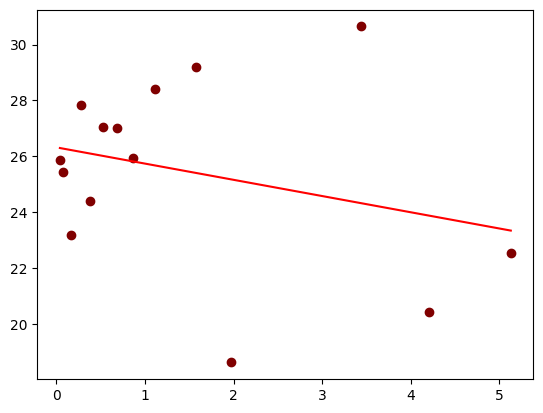

In [ ]:
# correlation between SES and yrseduc for INDIA
table = pd.DataFrame(tables)
table = table.dropna()
table=table[table["country"]=="India"]
plt.scatter(table["yrseduc"],table["SES"], color ='maroon')
plt.plot(np.unique(table["yrseduc"]), np.poly1d(np.polyfit(table["yrseduc"], table["SES"], 1))
         (np.unique(table["yrseduc"])), color='red')

####Correlation Coefficient - GDPPC vs Years of Education (India)

Correlation between GDPPC and Years of Education (Literacy) in India

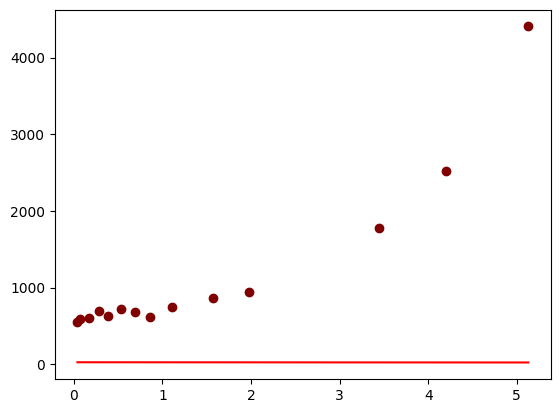

In [ ]:
# correlation between gdppc and yrseduc for INDIA
table = pd.DataFrame(tables)
table = table.dropna()
table=table[table["country"]=="India"]
plt.scatter(table["yrseduc"],table["gdppc"], color ='maroon')
plt.plot(np.unique(table["yrseduc"]), np.poly1d(np.polyfit(table["yrseduc"], table["SES"], 1))
         (np.unique(table["yrseduc"])), color='red')

####Conclusion Correlation
The final conclusions drawn from exploring the dataset globally of SES and GDPPC vs the mean years of education and the final inferences we can draw from that.

<h2><b>Inferences:</b></h2>

Correlations (Global)
1.   **SES vs Years of Education:**  The visualization shows a positive correlation between the Socio-Economic Score (SES) and the mean years of education across the world. This suggests that countries with higher SES tend to have a higher mean years of education for their citizens.


2.   **GDPPC vs Years of Education:** The visualization shows a positive correlation between Gross Domestic Product per Capita (GDPPC) and the mean years of education across the world. This suggests that countries with higher GDPPC tend to have a higher mean years of education for their citizens.


Correlations (India)
1.   **SES vs Years of Education:** The visualization shows a positive correlation between SES and the mean years of education in India. This suggests that in India, higher SES is associated with a higher mean years of education.

2.   **GDPPC vs Years of Education:** The visualization shows a positive correlation between GDPPC and the mean years of education in India. This suggests that in India, higher GDPPC is associated with a higher mean years of education.

<h2><b>Conlusions:</b></h2>

*   Both SES and GDPPC are important factors that impact the literacy rate and mean years of education in a country.
*   Countries with higher SES and GDPPC tend to have higher literacy rates and longer mean years of education.
*   Improving SES and GDPPC can help increase the mean years of education and literacy rate in a country.
*   In the case of India, improving SES and GDPPC can help increase the mean years of education and literacy rate in the country.



###Exploring the Dataset - **India**

This Dataset contains the following fields and inferences are drawn from the following factors:

Dataset is collected in **India Statewise** from **2013-2016**
1.   Toilet Facilities (Girls and Boys)
2.   Electricity
3.   Computers
4.   Water Facilities
5.   Enrollment Ratio
6.   Literacy Rate per State

All these facilities are further categorised into Primary, Upper Primary, Secondary, Senior Secondary, etc.

**Total Number of Columns - 70**

####Dataset Overview and Exploration

Importing all the necessary modules and viewing the dataset at a glance

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot
import matplotlib.pyplot as plt

indiastatewise = pd.read_csv("/content/drive/MyDrive/DV/india-statewise-2013-2016.csv", encoding='latin-1')
indiastatewise

,State_UT,Year,Primary_Boys_Enrollment,Primary_Girls_Enrollment,Primary_Total_Enrollment,Upper_Primary_Boys_Enrollment,Upper_Primary_Girls_Enrollment,Upper_Primary_Total_Enrollment,Secondary_Boys_Enrollment,Secondary_Girls_Enrollment,...,Primary_with_U_Primary_Sec_HrSec_Toilet_Boys,U_Primary_Only_Toilet_Boys,U_Primary_With_Sec_HrSec_Toilet_Boys,Primary_with_U_Primary_Sec_Toilet_Boys,U_Primary_With_Sec_Toilet_Boys,Sec_Only_Toilet_Boys,Sec_with_HrSec_Toilet_Boys,HrSec_Only_Toilet_Boys,All Schools_Toilet_Boys,Literacy_Rate_Extrapolated
0,All India,2013-14,100.20,102.65,101.36,86.31,92.75,89.33,76.80,76.47,...,97.91,88.14,96.05,94.51,80.89,97.97,94.68,74.36,86.56,74.142679
1,Andaman & Nicobar Islands,2013-14,95.88,91.97,93.93,94.70,88.98,91.83,102.89,97.36,...,100.00,0.00,100.00,100.00,0.00,0.00,100.00,0.00,94.52,86.270000
2,Andhra Pradesh,2013-14,96.62,96.87,96.74,82.81,84.38,83.57,73.76,76.77,...,82.05,45.45,64.11,76.24,60.63,59.26,85.71,73.44,56.88,67.406102
3,Arunachal Pradesh,2013-14,129.12,127.77,128.46,112.64,115.27,113.94,88.37,84.89,...,89.06,0.00,70.00,82.32,95.45,0.00,0.00,0.00,48.73,66.950000
4,Assam,2013-14,111.77,115.16,113.43,87.85,98.69,93.13,65.60,77.20,...,87.50,51.47,72.69,82.42,67.94,0.00,0.00,0.00,60.17,75.563585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,Telangana,2015-16,103.13,102.90,103.02,88.61,90.27,89.41,80.73,84.44,...,100.00,0.00,100.00,100.00,100.00,0.00,100.00,100.00,100.00,0.000000
106,Tripura,2015-16,107.58,108.36,107.96,125.75,130.33,127.97,116.17,120.91,...,99.11,100.00,100.00,100.00,100.00,0.00,0.00,0.00,99.69,87.750000
107,Uttar Pradesh,2015-16,88.63,96.16,92.15,68.24,83.49,75.08,67.65,67.86,...,99.52,99.74,99.78,99.89,99.89,98.82,99.81,92.31,99.74,71.013934
108,Uttarakhand,2015-16,98.87,99.76,99.29,85.84,88.07,86.89,85.71,85.73,...,99.57,97.09,99.11,99.38,98.20,93.15,98.13,100.00,97.43,82.727076


In [ ]:
column_name=list(indiastatewise.columns)
column_name
#len(column_name)


####Bar Plots - Facilities vs State

Plotting all the facilities in different colors statewise as Bar-Plots

In [ ]:
df_enroll = indiastatewise.iloc[:,0:14]
df_comp = indiastatewise.iloc[:,[0,1,14,15,16,17,18,19,20,21,22,23,24]]
df_water = indiastatewise.iloc[:,[0,1,25,26,27,28,29,30,31,32,33,34,35]]
df_elec = indiastatewise.iloc[:,[0,1,36,37,38,39,40,41,42,43,44,45,46]]
df_girls_toilet = indiastatewise.iloc[:,[0,1,47,48,49,50,51,52,53,54,55,56,57]]
df_boys_toilet = indiastatewise.iloc[:,[0,1,58,59,60,61,62,63,64,65,66,67,68]]
top_list_boys = df_boys_toilet.sort_values(['All Schools_Toilet_Boys'],ascending=False)
top_list_girls = df_girls_toilet.sort_values(['All Schools_Toilet_Girls'],ascending = False)
top_list_comp = df_comp.sort_values(['All Schools_Comps'],ascending=False)
top_list_elec = df_elec.sort_values(['All Schools_Electricity'],ascending=False)
top_list_water = df_water.sort_values(['All Schools_Water'],ascending=False)
top_list_water.rename(columns={'State/UT':'State_UT','year':'Year'},inplace=True)


In [ ]:
color_list = ['magenta','purple','red','green','blue']
df_list = [top_list_comp,top_list_elec,top_list_water,top_list_boys,top_list_girls]
name_list = ['computerStats','ElectrictyStats','WaterStats','BoysWashrooms','GirlsWashrooms']
sub_list = ['_Comps','_Electricity','_Water','_Toilet_Boys','_Toilet_Girls']
for i,j,k,s in zip(df_list,color_list,name_list,sub_list):
    #print(f' bar plot of <{k}> DataFrame')
    fig = px.bar(data_frame=i,x = 'State_UT',y = str('All Schools'+s),labels={'x':'State_UT','y':'All Schools'},opacity=0.8,color_discrete_sequence=[j],title=k)
    fig.show()

####Bar Plots - Statewise Facilities vs Education Level

Plotting all the facilities statewise as to the division of all the levels of schools in a Bar Plot format

In [ ]:
def allplots(df,name,title,sub):
        
        x = df.State_UT

        trace_1 = {
            'x':x,
            'y':df[str("Primary_Only"+sub)],
            'name':'Primary_Education',
            'type':'bar'
        };
        trace_2 = {
            'x':x,
            'y':df[str("Sec_Only"+sub)],
            'name':'Secondary_Education',
            'type':'bar'
        };
        trace_3 = {
            'x':x,
            'y':df[str("HrSec_Only"+sub)],
            'name':'HigherSecondary',
            'type':'bar',
        };
        trace_4 = {
            'x':x,
            'y':df[str("Primary_with_U_Primary"+sub)],
            'name':'UnderPrimary',
            'type':'bar',
        };
        trace_5 = {
            'x':x,
            'y': df[str("Primary_with_U_Primary_Sec"+sub)],
            'name':'PrimarywithSecondary',
            'type':'bar',
        };
        trace_6 = {
            'x':x,
            'y':df[str("Primary_with_U_Primary_Sec_HrSec"+sub)],
            'name':'Primary with SeniorSecondary',
            'type':'bar'
        };
        trace_7 = {
            'x':x,
            'y':df[str("U_Primary_Only"+sub)],
            'name':'UnderPrimary',
            'type':'bar',
        };
        trace_8 = {
            'x':x,
            'y':df[str("U_Primary_With_Sec"+sub)],
            'name':'UnderPrimaryWithSecondary',
            'type':'bar'
        };
        trace_9 = {
            'x':x,
            'y':df[str("U_Primary_With_Sec_HrSec"+sub)],
            'name':'UnderPrimarywithSeniorSecondary',
            'type':'bar'
        };
        data = [trace_1,trace_2,trace_3,trace_4,trace_5,trace_6,trace_7,trace_8,trace_9]
        layout = {
            'xaxis':{'title': name},
            'barmode':'relative',
            'title': title,
        }
        fig = go.Figure(data = data,layout=layout)

        iplot(fig)

In [ ]:

df_list = [top_list_comp,top_list_elec,top_list_water,top_list_boys,top_list_girls]
name_list = ['Computers used stats','Electricity used stats','Water Facility stats','Boys Washroom Stats','Girls Washroom Stats']
title_list = ['States contributing towards Computer Schools','Electricity provided in Schools','Water Facility is Schools','Boys Washroom Stats','Girls Washroom Stats']
sub_list = ['_Comps','_Electricity','_Water','_Toilet_Boys','_Toilet_Girls']
for i,j,k,l in zip(df_list,name_list,title_list,sub_list):
    allplots(i,j,k,l)

####Bubble Plots - Statewise Facilities vs Education Level

Plotting all the facilities statewise as to the division of all the levels of schools in a Bubble Plot format

In [ ]:
def bubbleplot(df,j,k):
    data = [
        {
            'y':df[j],
            'x':df[k],
            'mode':'markers',
            'marker':{
                'color':df[j],
                'size':df[k],
                'showscale':True,
            },
            "text":df.State_UT
        }
    ]
    iplot(data)

In [ ]:
col_list = ['Primary_Only', 'Primary_with_U_Primary',
       'Primary_with_U_Primary_Sec_HrSec', 'U_Primary_Only',
       'U_Primary_With_Sec_HrSec', 'Primary_with_U_Primary_Sec',
       'U_Primary_With_Sec', 'Sec_Only', 'Sec_with_HrSec.', 'HrSec_Only']
sub_list = ['_Comps','_Electricity','_Water','_Toilet_Boys','_Toilet_Girls']
l = 0
for df,j,s in zip(df_list,col_list,sub_list):
    k = str(col_list[l+1]+s)
    j=str(j+s)
    print(f' bubble plot of {j} and {k} is shown below ↓')
    bubbleplot(df,j,k);
    l+=1
    #print('='*120)

 bubble plot of Primary_Only_Comps and Primary_with_U_Primary_Comps is shown below ↓


 bubble plot of Primary_with_U_Primary_Electricity and Primary_with_U_Primary_Sec_HrSec_Electricity is shown below ↓


 bubble plot of Primary_with_U_Primary_Sec_HrSec_Water and U_Primary_Only_Water is shown below ↓


 bubble plot of U_Primary_Only_Toilet_Boys and U_Primary_With_Sec_HrSec_Toilet_Boys is shown below ↓


 bubble plot of U_Primary_With_Sec_HrSec_Toilet_Girls and Primary_with_U_Primary_Sec_Toilet_Girls is shown below ↓


####Pie Chart - Statewise Facilities vs Education Level

Plotting all the facilities statewise as to the division of all the levels of schools in a Pie Chart format

In [ ]:
def charts(df,s):
    chart = px.pie(df,values=str('All Schools'+s),names = 'State_UT',height = 600)
    chart.update_traces(textposition = 'inside',textinfo = 'percent+label')
    
    chart.update_layout(title_x = 0.5,
                       geo = dict(showframe = False,
                                 showcoastlines = False))
    chart.show()

In [ ]:
name_list = ['computerStats','ElectrictyStats','WaterStats','BoysWashrooms','GirlsWashrooms']
sub_list = ['_Comps','_Electricity','_Water','_Toilet_Boys','_Toilet_Girls']
for i,k,s in zip(df_list,name_list,sub_list):
    print(f' pie chart of <{k}> is shown below ↓')
    charts(i,s)
    #print('='*100)

 pie chart of <computerStats> is shown below ↓


 pie chart of <ElectrictyStats> is shown below ↓


 pie chart of <WaterStats> is shown below ↓


 pie chart of <BoysWashrooms> is shown below ↓


 pie chart of <GirlsWashrooms> is shown below ↓


####Pie Chart - Statewise Education Level Facilities vs Extrapolated Literacy Rate (Statewise)

Plotting all the facilities statewise as to the division of all the levels of schools in a Pie Chart format with the **Extrapolated Literacy Rate** divided statewise and yearwise 

In [ ]:
#Literacy_Rate_extrapolated
y13 = indiastatewise.iloc[0:36,[0,1,69]]
y14 = indiastatewise.iloc[36:73,[0,1,69]]
y15 = indiastatewise.iloc[73:110,[0,1,69]]



In [ ]:
def litcharts(df):
    chart = px.pie(df,values='Literacy_Rate_Extrapolated',names = 'State_UT',height = 600)
    chart.update_traces(textposition = 'inside',textinfo = 'percent+label')
    
    chart.update_layout(title_x = 0.5,
                       geo = dict(showframe = False,
                                 showcoastlines = False))
    chart.show()

In [ ]:
name_list = ['Literacy Rate for year 2013-14','Literacy Rate for year 2014-15','Literacy Rate for year 2015-16']
yr_list = [y13,y14,y15]
for i,k in zip(yr_list,name_list):
    print(f' pie chart of <{k}> is shown below ↓')
    litcharts(i)
    #print('='*100)

 pie chart of <Literacy Rate for year 2013-14> is shown below ↓


 pie chart of <Literacy Rate for year 2014-15> is shown below ↓


 pie chart of <Literacy Rate for year 2015-16> is shown below ↓


####Conclusion and Inferences

<h2><b>Inferences:</b></h2>

$ **Facilities vs State**
*   The top five states with the highest **water facilities** are Lakshwadeep, Delhi, Chandigardh, Daman & Diu, Dadra & Nagar Haveli
*   The top five states with the highest **toilet facilities** are Lakshwadeep, Delhi, Chandigardh, Daman & Diu, Gujarat
*   The top five states with the highest **electricity facilities** are Lakshwadeep, Delhi, Chandigardh, Daman & Diu, Punjab
*   The top five states with the highest **computer facilities** are Lakshwadeep, Chandigardh, Kerela, Delhi, Gujarat

<br>

1.   **Bar Plots:**  The bar plot shows the number of schools, computer labs, toilet, water facilities in schools in each state of India. The advantage of using bar plots is that they are easy to read and compare different categories or groups. The disadvantage of using bar plots is that they may not be suitable for visualizing trends or relationships between variables.


$ **Statewise Facilities vs Education Level**

*   There is a clear trend of an increasing number of facilities with an increase in the education level in each state.
*   There is a wide variation in the number of facilities across different states, indicating that there is an uneven distribution of educational resources in India.
*   The states with the highest number of facilities across all education levels are - 

<br>

1.   **Bar Plots:** The bar plot shows the number of facilities across different education levels in each state of India. The advantage of using bar plots is that they are easy to read and compare different categories or groups. The disadvantage of using bar plots is that they may not be suitable for visualizing trends or relationships between variables.


2.   **Bubble Plots:** The bubble plot shows the same information as the bar plot but also adds a third dimension to the plot through the size of the bubbles, which represents the number of schools in each state. The advantage of using bubble plots is that they can represent three dimensions of data in a single plot. The disadvantage of using bubble plots is that they can be difficult to interpret if the bubbles overlap or are too small to see.

3.   **Pie Charts:** The pie chart shows the percentage of facilities across different education levels in each state of India. The advantage of using pie charts is that they can show the percentage distribution of data. The disadvantage of using pie charts is that they can be difficult to compare between different categories or groups.


$ **Statewise Education Level Facilities vs Extrapolated Literacy Rate** 
*   Across all states, the number of facilities generally increases with an increase in the education level.
*   There is a positive correlation between the number of facilities and the extrapolated literacy rate, indicating that the availability of educational resources can impact the literacy rate in a state.
*   The states with the highest extrapolated literacy rates across all education levels are Kerala, Lakshadweep, Mizoram, Tripura, and Goa.

<br>

1.   **Pie Charts:** The pie chart shows the percentage distribution of facilities across different education levels in each state of India and the extrapolated literacy rate in each state. The advantage of using pie charts is that they can show the percentage distribution of data. The disadvantage of using pie charts is that they can be difficult to compare between different categories or groups.

<h2><b>Conclusions:</b></h2>

1.   Educational facilities such as schools, toilets, water, electricity, computer labs, and science labs are important factors that impact the quality of education in India.

2.   The availability of educational resources varies widely across different states in India, indicating that there is an uneven distribution of resources.

3.   The number of facilities tends to increase with an increase in the education level in each state, indicating a positive trend towards improving the quality of education.

4.   There is a positive correlation between the number of facilities and the extrapolated literacy rate, indicating that improving the availability of educational resources can help increase the literacy rate in a state.

The choice of plot type depends on the type of data and the research question. Bar plots and pie charts are suitable for showing categorical data, while bubble plots can represent three dimensions of data in a single plot. However, each plot type has its advantages and disadvantages, and it is important to choose the appropriate plot type based on the research question and the type of data being visualized.



#Review-3
Here, we provide the inferences from each of the graphs, and help people of India and Government of India to understand better about the state of Indian Schools to take immediate actions if needed.

##Gross Enrollment Ratio

The GER comprises pupils who are repeating a grade, those who entered later and are older than their peers, or those who have advanced swiftly and are younger than their classmates, for instance, in India it increased from 25.8 to 26.3. By doing so, it is possible for enrollment to surpass the population that is appropriate for that level of education.
<br><br>
The GER may exceed 100% due to the inclusion of pupils who may fall outside of the designated age range.



In [ ]:
# !pip install geopandas
# !pip install descartes

import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd
import descartes

In [ ]:
df_ger = pd.read_csv('gross-enrollment-ratio-2013-2016.csv')
df_ger.head(10)

,State_UT,Year,Primary_Boys,Primary_Girls,Primary_Total,Upper_Primary_Boys,Upper_Primary_Girls,Upper_Primary_Total,Secondary_Boys,Secondary_Girls,Secondary_Total,Higher_Secondary_Boys,Higher_Secondary_Girls,Higher_Secondary_Total
0,Andaman & Nicobar Islands,2013,95.88,91.97,93.93,94.70,88.98,91.83,102.89,97.36,100.16,105.4,96.61,101.28
1,Andhra Pradesh,2013,96.62,96.87,96.74,82.81,84.38,83.57,73.76,76.77,75.20,59.83,60.83,60.3
2,Arunachal Pradesh,2013,129.12,127.77,128.46,112.64,115.27,113.94,88.37,84.89,86.65,65.16,65.38,65.27
3,Assam,2013,111.77,115.16,113.43,87.85,98.69,93.13,65.60,77.20,71.21,31.78,34.27,32.94
4,Bihar,2013,95.03,101.15,97.96,80.60,94.92,87.24,57.66,62.96,60.08,23.33,24.17,23.7
5,Chandigarh,2013,88.42,96.09,91.85,99.93,103.02,101.27,92.08,92.16,92.11,90.5,92.88,91.49
6,Chhattisgarh,2013,104.06,103.93,103.99,100.35,101.10,100.72,96.68,99.32,97.99,58.27,56.16,57.23
7,Dadra & Nagar Haveli,2013,89.50,81.89,85.78,100.76,91.43,96.22,87.79,79.08,83.66,37.77,41.99,39.64
8,Daman & Diu,2013,87.80,89.78,88.69,84.06,90.61,86.97,67.94,82.20,73.88,34.37,64.55,44.36
9,Delhi,2013,108.78,112.95,110.67,117.76,129.50,122.91,102.02,102.86,102.40,98.88,102.3,100.42


In [ ]:
# Arrange the `year` column in ascending order
df_ger = df_ger.sort_values('Year',ascending=True)

# Dataframe for `All India` Gross Enrollment Ratio
ger_ai = df_ger[df_ger['State_UT'] == 'All India'].reset_index(drop=True)

print("Gross Enrollment Ratio - All India (2013-2016)")
display(ger_ai)

Gross Enrollment Ratio - All India (2013-2016)


,State_UT,Year,Primary_Boys,Primary_Girls,Primary_Total,Upper_Primary_Boys,Upper_Primary_Girls,Upper_Primary_Total,Secondary_Boys,Secondary_Girls,Secondary_Total,Higher_Secondary_Boys,Higher_Secondary_Girls,Higher_Secondary_Total
0,All India,2013,100.20,102.65,101.36,86.31,92.75,89.33,76.80,76.47,76.64,52.77,51.58,52.21
1,All India,2014,98.85,101.43,100.08,87.71,95.29,91.24,78.13,78.94,78.51,54.57,53.81,54.21
2,All India,2015,97.87,100.69,99.21,88.72,97.57,92.81,79.16,80.97,80.01,55.95,56.41,56.16


In [ ]:
def drop_rows(dataframe,given_list,search_value):
    for i in given_list:
        dataframe = dataframe[~dataframe[i].str.contains(search_value)].reset_index(drop=True)
    
    return dataframe

ger_column_list = ['Higher_Secondary_Boys','Higher_Secondary_Girls','Higher_Secondary_Total']

df_ger = drop_rows(df_ger,ger_column_list,'NR')
df_ger = drop_rows(df_ger,ger_column_list,'@')

In [ ]:
def convert_to_float(dataframe,given_list,which_type):
    for i in given_list:
        dataframe[i] = dataframe[i].astype(which_type)
    return dataframe

df_ger = convert_to_float(df_ger,ger_column_list,float)


In [ ]:
df_ger.info()

In [ ]:
ger_girls_list = ['State_UT','Year','Primary_Girls','Upper_Primary_Girls','Secondary_Girls','Higher_Secondary_Girls']
ger_boys_list = ['State_UT','Year','Primary_Boys','Upper_Primary_Boys','Secondary_Boys','Higher_Secondary_Boys']

ger_girls = ger_ai.loc[:,ger_girls_list]
ger_boys = ger_ai.loc[:,ger_boys_list]

In [ ]:
tidy_girls = pd.melt(ger_girls,id_vars=['Year','State_UT']).rename(columns=str.title)
tidy_boys = pd.melt(ger_boys,id_vars=['Year','State_UT']).rename(columns=str.title)

print(tidy_girls)
print("\n")
print(tidy_boys)

    Year   State_Ut                Variable   Value
0   2013  All India           Primary_Girls  102.65
1   2014  All India           Primary_Girls  101.43
2   2015  All India           Primary_Girls  100.69
3   2013  All India     Upper_Primary_Girls   92.75
4   2014  All India     Upper_Primary_Girls   95.29
5   2015  All India     Upper_Primary_Girls   97.57
6   2013  All India         Secondary_Girls   76.47
7   2014  All India         Secondary_Girls   78.94
8   2015  All India         Secondary_Girls   80.97
9   2013  All India  Higher_Secondary_Girls   51.58
10  2014  All India  Higher_Secondary_Girls   53.81
11  2015  All India  Higher_Secondary_Girls   56.41


    Year   State_Ut               Variable  Value
0   2013  All India           Primary_Boys  100.2
1   2014  All India           Primary_Boys  98.85
2   2015  All India           Primary_Boys  97.87
3   2013  All India     Upper_Primary_Boys  86.31
4   2014  All India     Upper_Primary_Boys  87.71
5   2015  All India   

**Girls**

Let's see how the trends have been in Gross Enrollment Ratio for Girls.

- Girls who join Primary School have exceeded 100 GER which means the students also include who are repeating a grade, or those who enrolled late and are older than their classmates, or those who have advanced quickly and are younger than their classmates. This is a positive sign in a developing country like India.
- However, the ratio has been consistently decreasing over the years. There could be two reasons for this decrease:
    1. Either students who are repeating grades & those who have enrolled late are decreasing over time,
    2. Or, there's an actual decrease in enrollments for primary schools among girls.
- Indian Government has look into this to take a quick action if it's the second reason.
- There's a considerable increase in GER from 2013-2016 for girls who are joining Upper Primary, Secondary, and Higher Secondary Schools. This is again a very positive sign.

**Boys**

Let's see how the trends have been in Gross Enrollment Ratio for Boys.

- The trends for Primary Schools are the same as girls. Again, if we could look further into data about the GER, we could gather some important information as to why there's a decrease in GER for Girls and Boys.
- Compared to Girls, the GER of Boys in Upper Primary is very low. This is a negative sign because this might affect the enrollments of Secondary and Higher Secondary Schools among boys.

**General**

- We can also observe that there's a big difference between Secondary and Higher Secondary Enrollments. There could be many reasons like:
    1. Students might migrate to better colleges in cities/towns.
    2. They might enroll themselves in Coaching Centres such as IIT/AIEEE/etc.


###State-Wise GER

In [ ]:
# Dataframe for only states

ger_states = df_ger[df_ger['State_UT'] != 'All India'].reset_index(drop=True)
ger_states.State_UT.unique()

#renaming state names
ger_states['State_UT'].replace({"Andaman & Nicobar Islands": "A and N Islands",
                      'Jammu And Kashmir':'J & K',
                      'MADHYA PRADESH':'Madhya Pradesh',
                      'Pondicherry':'Puducherry'
                     }, inplace=True)

ger_states_girls = ger_states.loc[:,ger_girls_list]
ger_states_boys = ger_states.loc[:,ger_boys_list]

In [ ]:
# Add 'india-states' dataset to your working directory and perform the analysis

fp = "Indian_States.shp"
map_df = gpd.read_file(fp)

# renaming state names
map_df['st_nm'].replace({"Andaman & Nicobar Island": "A and N Islands",
                      "Arunanchal Pradesh": "Arunachal Pradesh",
                      'Dadara & Nagar Havelli':'Dadra & Nagar Haveli',
                      'Jammu & Kashmir':'J & K',
                      'NCT of Delhi':'Delhi',
                     }, inplace=True)

# Merging `ger_states_girls` and `map_df`

merged_girls = map_df.set_index('st_nm').join(ger_states_girls.set_index('State_UT')).dropna()
merged_boys = map_df.set_index('st_nm').join(ger_states_boys.set_index('State_UT')).dropna()

####State-Wise GER of Girls

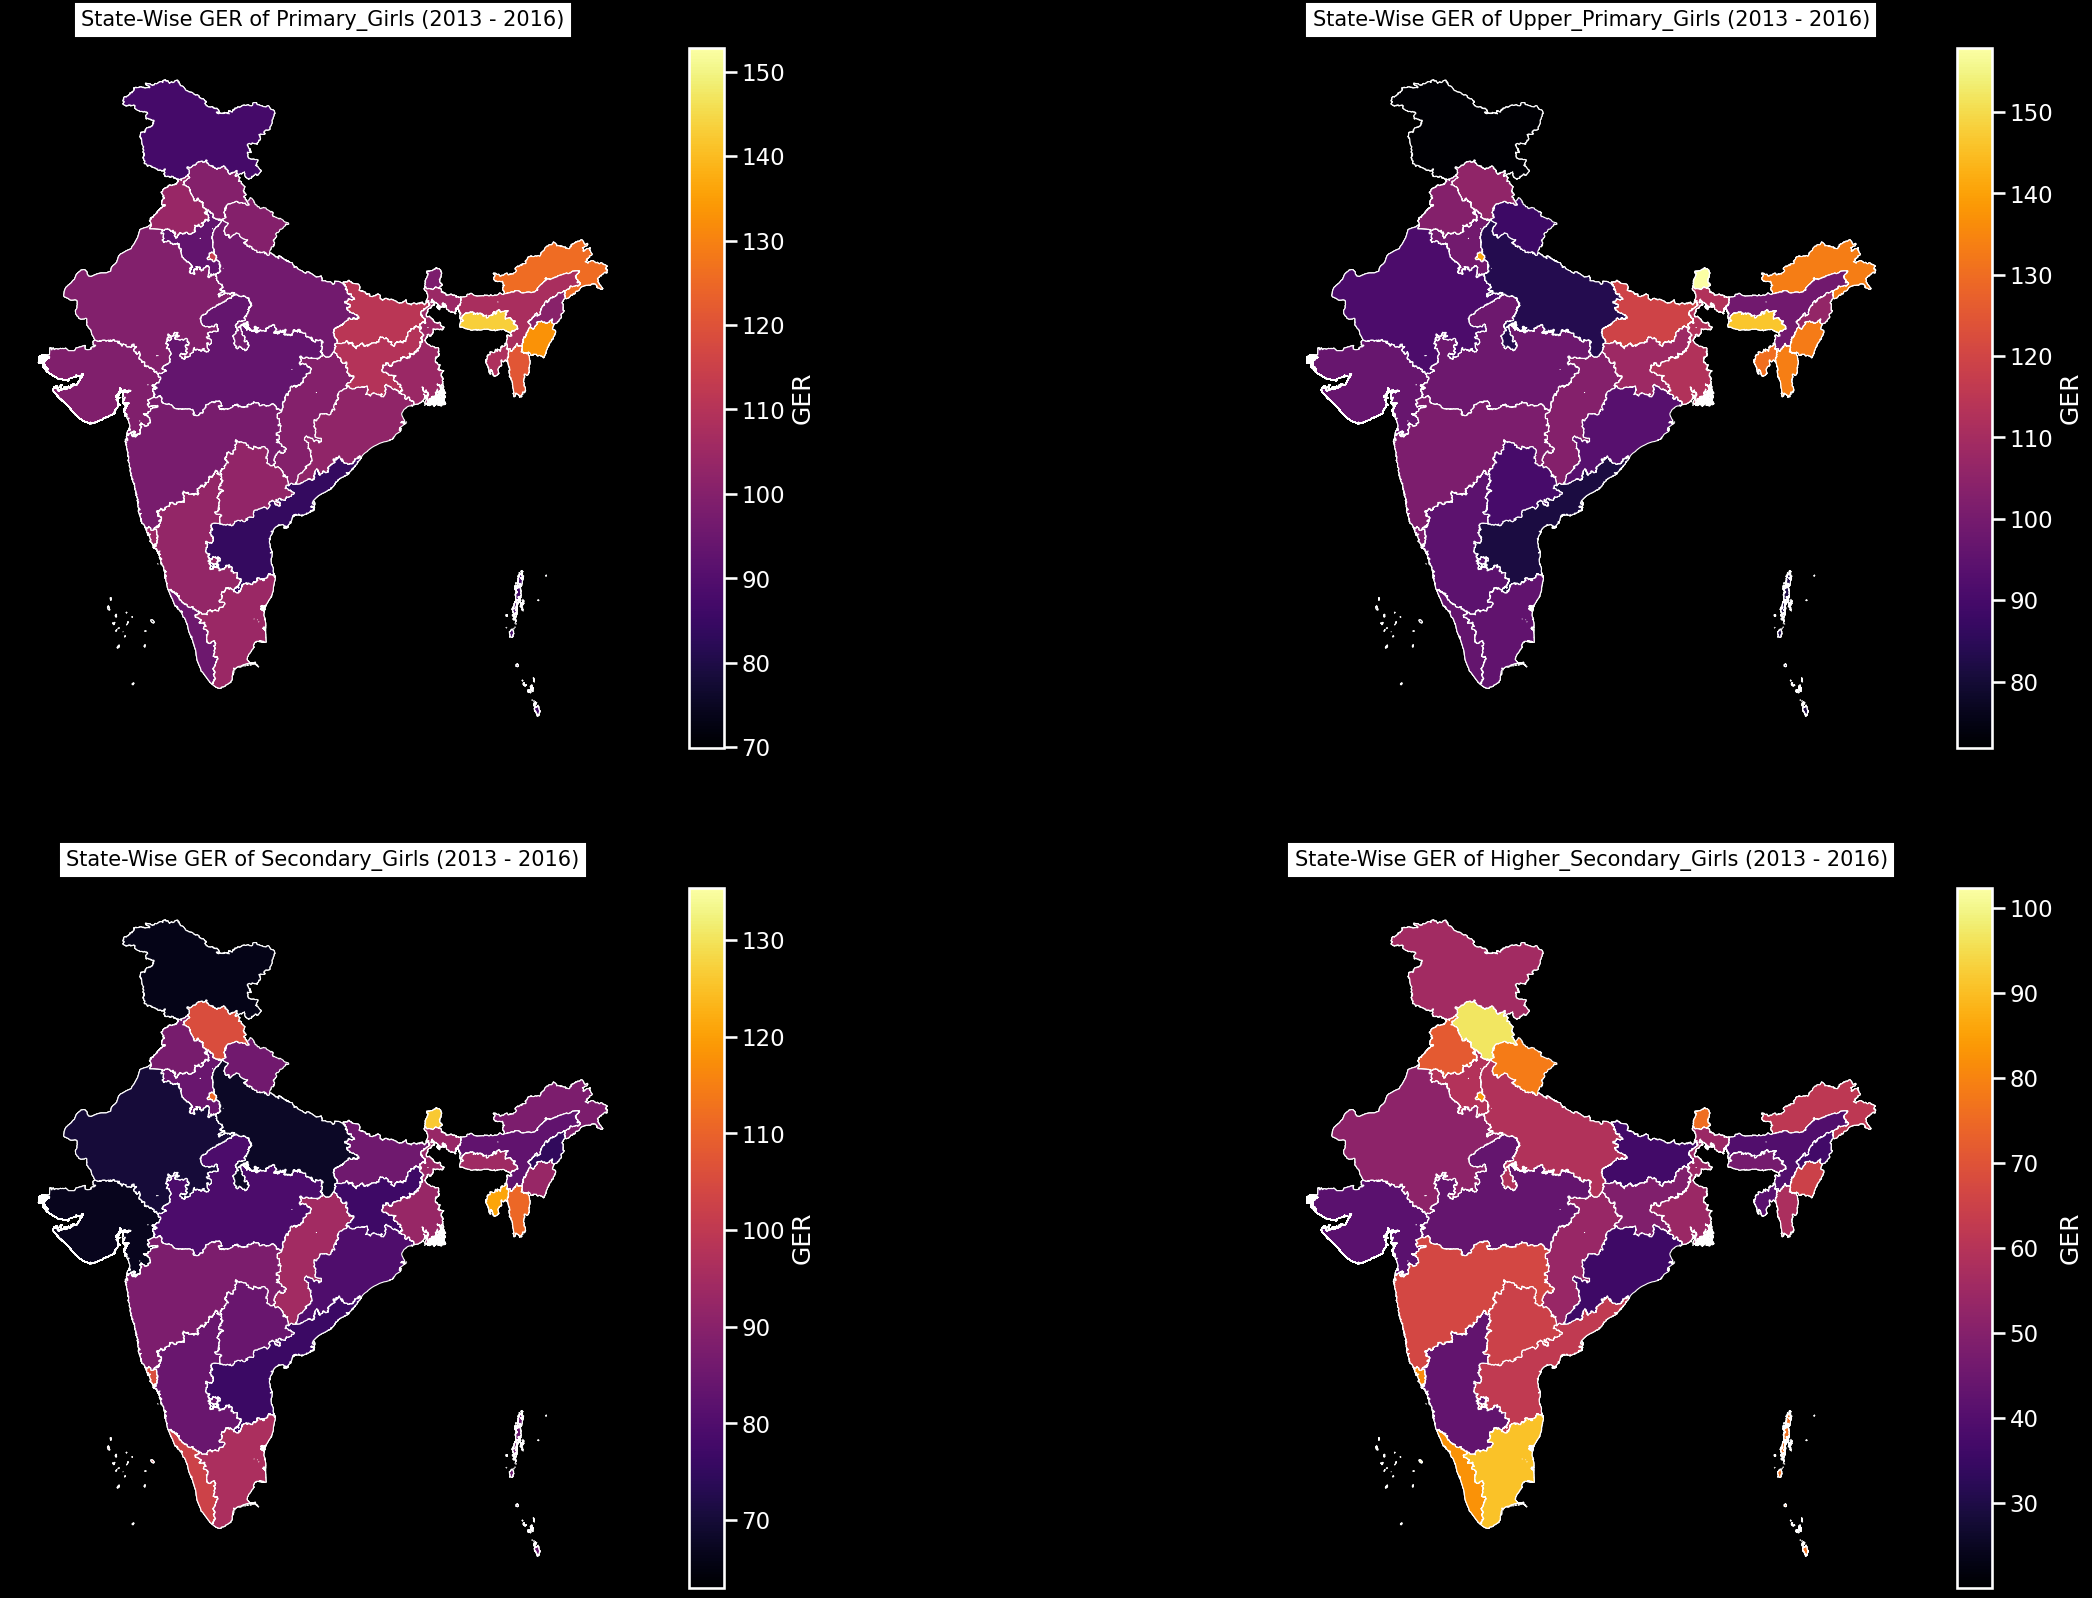

In [ ]:
# State-wise plots of GER for Girls in different grade levels

fig, ax = plt.subplots(2, 2, figsize=(30, 20))
ax[0,0].axis('off')
ax[0,1].axis('off')
ax[1,0].axis('off')
ax[1,1].axis('off')

# some variables which you can play with

fontdict = {'fontsize': '15', 'fontweight' : '3'}
pad = 16
color = 'black'
bbox = dict(facecolor='white', alpha=1.0)

cmap = 'inferno'
linewidth = 0.8
edgecolor = 'white'

ax[0,0].set_title("State-Wise GER of Primary_Girls (2013 - 2016)", fontdict=fontdict,
                  pad = pad, color=color,bbox=bbox)

g1 = merged_girls.plot(column='Primary_Girls', cmap=cmap, linewidth=linewidth, 
                  ax=ax[0,0], edgecolor=edgecolor, legend=True,legend_kwds={'label': "GER"})

ax[0,1].set_title("State-Wise GER of Upper_Primary_Girls (2013 - 2016)", fontdict=fontdict,
                  pad = pad, color=color,bbox=bbox)

g2 = merged_girls.plot(column='Upper_Primary_Girls', cmap=cmap, linewidth=linewidth, 
                  ax=ax[0,1], edgecolor=edgecolor, legend=True,legend_kwds={'label': "GER"})

ax[1,0].set_title("State-Wise GER of Secondary_Girls (2013 - 2016)", fontdict=fontdict,
                  pad = pad, color=color,bbox=bbox)
g3 = merged_girls.plot(column='Secondary_Girls', cmap=cmap, linewidth=linewidth, 
                  ax=ax[1,0], edgecolor=edgecolor, legend=True,legend_kwds={'label': "GER"})

ax[1,1].set_title("State-Wise GER of Higher_Secondary_Girls (2013 - 2016)", fontdict=fontdict,
                  pad = pad, color=color,bbox=bbox)

g4 = merged_girls.plot(column='Higher_Secondary_Girls', cmap=cmap, linewidth=linewidth, 
                  ax=ax[1,1], edgecolor=edgecolor, legend=True,legend_kwds={'label': "GER"})

- It's clear from the graph that the Primary_Girls GER is the highest for Eastern states like Assam, Mizoram, etc and it's the lowest for Andhra Pradesh and J & K.
- Upper_Primary_Girls GER is the lowest in J & K and that too at an alarming number! AP also has a lot of room for improvement in its GER.
- Secondary_Girls GER top 3 lowest states are J & K, Uttar Pradesh, and Gujarat. This is really concerning. 
- There is a lot of Yellow and Orange in different states for Higher_Secondary_Girls and that's a really good sign!

####State-Wise GER of Boys

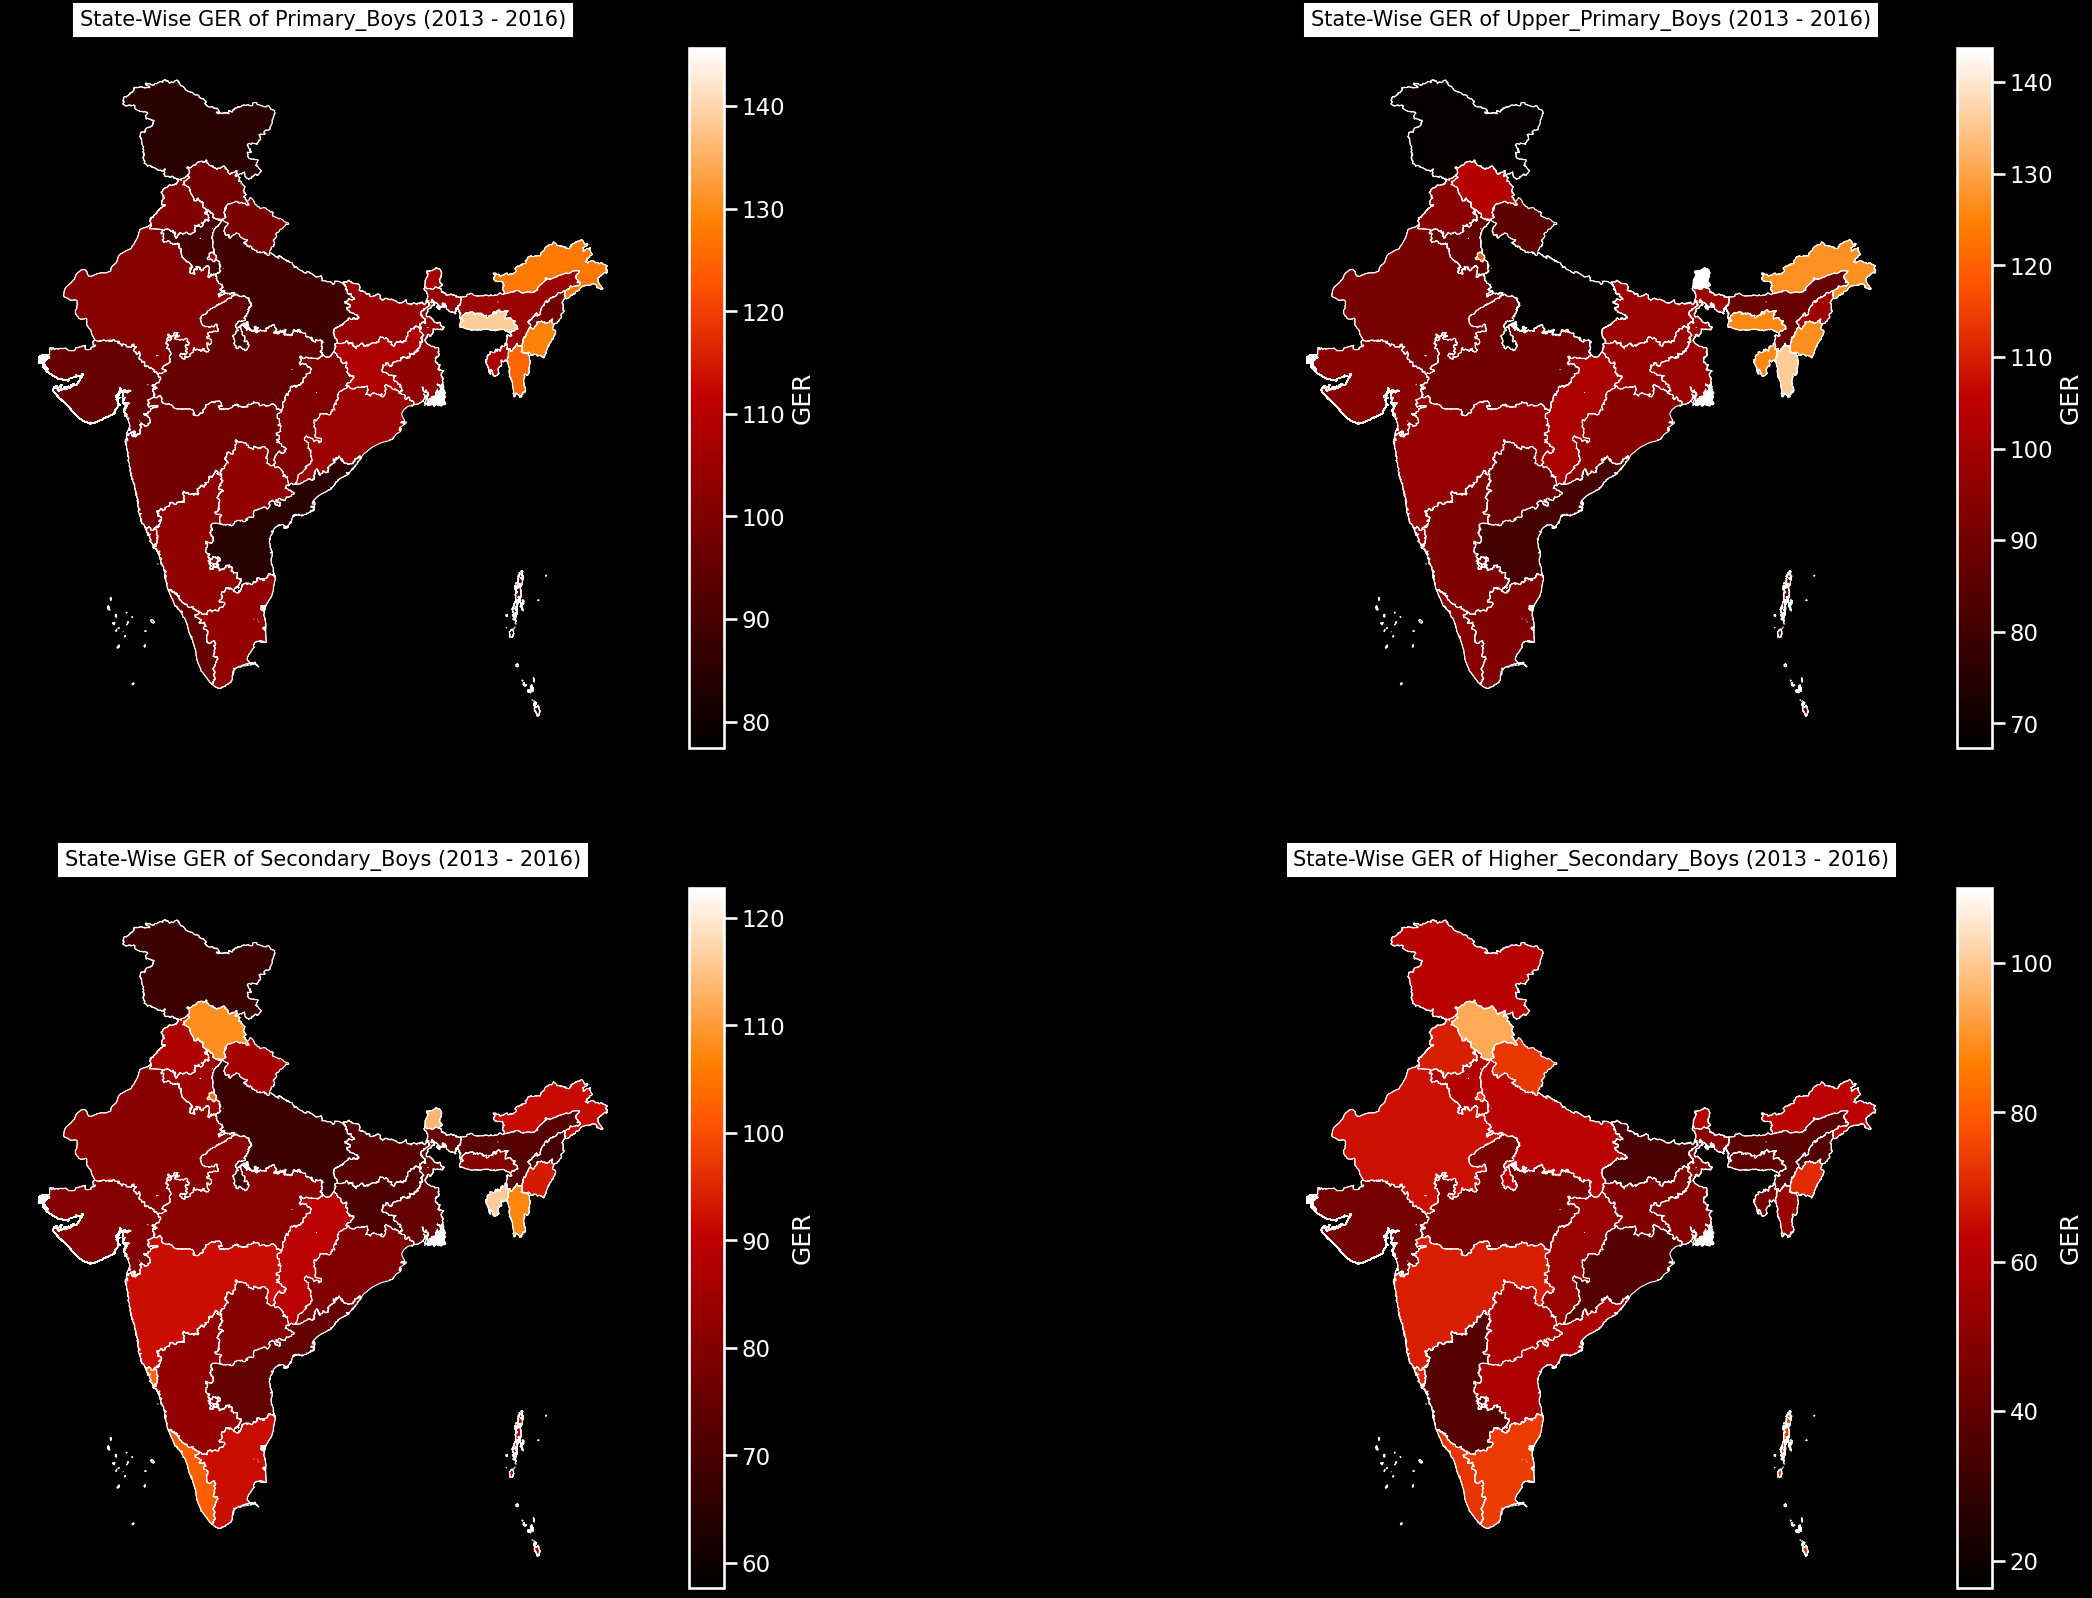

In [ ]:
# State-wise plots of GER for Boys in different grade levels

fig, ax = plt.subplots(2, 2, figsize=(30, 20))
ax[0,0].axis('off')
ax[0,1].axis('off')
ax[1,0].axis('off')
ax[1,1].axis('off')

fontdict = {'fontsize': '15', 'fontweight' : '3'}
pad = 16
color = 'black'
bbox = dict(facecolor='white', alpha=1.0)

cmap = 'gist_heat'
linewidth = 0.8
edgecolor = 'white'

ax[0,0].set_title("State-Wise GER of Primary_Boys (2013 - 2016)", fontdict=fontdict,
                  pad = pad, color=color,bbox=bbox)

b1 = merged_boys.plot(column='Primary_Boys',cmap=cmap, linewidth=linewidth, 
                  ax=ax[0,0], edgecolor=edgecolor, legend=True,legend_kwds={'label': "GER"})

ax[0,1].set_title("State-Wise GER of Upper_Primary_Boys (2013 - 2016)", fontdict=fontdict,
                  pad = pad, color=color,bbox=bbox)

b2 = merged_boys.plot(column='Upper_Primary_Boys', cmap=cmap, linewidth=linewidth, 
                  ax=ax[0,1], edgecolor=edgecolor, legend=True,legend_kwds={'label': "GER"})

ax[1,0].set_title("State-Wise GER of Secondary_Boys (2013 - 2016)", fontdict=fontdict,
                  pad = pad, color=color,bbox=bbox)

b3 = merged_boys.plot(column='Secondary_Boys', cmap=cmap, linewidth=linewidth, 
                  ax=ax[1,0], edgecolor=edgecolor, legend=True,legend_kwds={'label': "GER"})

ax[1,1].set_title("State-Wise GER of Higher_Secondary_Boys (2013 - 2016)", fontdict=fontdict,
                  pad = pad, color=color,bbox=bbox)

b4 = merged_boys.plot(column='Higher_Secondary_Boys', cmap=cmap, linewidth=linewidth, 
                  ax=ax[1,1], edgecolor=edgecolor, legend=True,legend_kwds={'label': "GER"})

- Like Girls, Primary_Boys' GER also follows almost similar pattern.
- Top 2 Lowest for Upper_Primary_Boys' GER are J & K and Uttar Pradesh.
- Compared to Girls, Boys' GER in Secondary Schools is not so alarming.
- The pattern for Higher Secondary Boys look similar to the Girls.

##Dropout Ratio

In [ ]:
df_dr = pd.read_csv('dropout-ratio-2012-2015.csv')
df_dr.head(10)

,State_UT,year,Primary_Boys_Dropout,Primary_Girls_Dropout,Primary_Total_Dropout,Upper Primary_Boys_Dropout,Upper Primary_Girls_Dropout,Upper Primary_Total_Dropout,Secondary _Boys_Dropout,Secondary _Girls_Dropout,Secondary _Total_Dropout,HrSecondary_Boys_Dropout,HrSecondary_Girls_Dropout,HrSecondary_Total_Dropout,Unnamed: 14,
0,All India,2012-13,4.68,4.66,4.67,2.3,4.01,3.13,14.54,14.54,14.54,NR,NR,NR,NaN,NaN
1,All India,2013-14,4.53,4.14,4.34,3.09,4.49,3.77,17.93,17.79,17.86,1.48,1.61,1.54,NaN,NaN
2,All India,2014-15,4.36,3.88,4.13,3.49,4.6,4.03,17.21,16.88,17.06,0.25,NR,NR,NaN,NaN
3,Andaman & Nicobar Islands,2012-13,0.83,0.51,0.68,Uppe_r_Primary,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14,NaN,NaN
4,Andaman & Nicobar Islands,2013-14,1.35,1.06,1.21,NR,1.54,0.51,8.36,5.98,7.2,18.94,12.2,15.87,NaN,NaN
5,Andaman & Nicobar Islands,2014-15,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93,NaN,NaN
6,Andhra Pradesh,2012-13,3.3,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,NR,0.35,NaN,NaN
7,Andhra Pradesh,2013-14,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79,NaN,NaN
8,Andhra Pradesh,2014-15,6.57,6.89,6.72,5.09,5.32,5.2,15.81,15.6,15.71,NR,NR,NR,NaN,NaN
9,Arunachal Pradesh,2013-14,11.54,10.22,10.89,4.44,6.74,5.59,16.08,12.75,14.49,18.57,15.49,17.07,NaN,NaN


In [ ]:
# Arrange the `year` column in ascending order
df_dr = df_dr.sort_values('year',ascending=True)

# Dataframe for `All India` Gross Enrollment Ratio
dr_ai = df_dr[df_dr['State_UT'] == 'All India'].reset_index(drop=True)

In [ ]:
dr_column_list = ['Primary_Boys_Dropout','Primary_Girls_Dropout','Primary_Total_Dropout','Upper Primary_Boys_Dropout',
       'Upper Primary_Girls_Dropout','Upper Primary_Total_Dropout','Secondary _Boys_Dropout','Secondary _Girls_Dropout',
       'Secondary _Total_Dropout','HrSecondary_Boys_Dropout','HrSecondary_Boys_Dropout','HrSecondary_Girls_Dropout','HrSecondary_Total_Dropout']

In [ ]:
df_dr = drop_rows(df_dr,dr_column_list,'NR')
df_dr = drop_rows(df_dr,['Upper Primary_Boys_Dropout'],'Uppe_r_Primary') #anomaly

In [ ]:
df_dr = convert_to_float(df_dr,dr_column_list,float)

print("Drop Out Ratio - All India (2012-2015)")
display(dr_ai)

Drop Out Ratio - All India (2012-2015)


,State_UT,year,Primary_Boys_Dropout,Primary_Girls_Dropout,Primary_Total_Dropout,Upper Primary_Boys_Dropout,Upper Primary_Girls_Dropout,Upper Primary_Total_Dropout,Secondary _Boys_Dropout,Secondary _Girls_Dropout,Secondary _Total_Dropout,HrSecondary_Boys_Dropout,HrSecondary_Girls_Dropout,HrSecondary_Total_Dropout,Unnamed: 14,
0,All India,2012-13,4.68,4.66,4.67,2.3,4.01,3.13,14.54,14.54,14.54,NR,NR,NR,NaN,NaN
1,All India,2013-14,4.53,4.14,4.34,3.09,4.49,3.77,17.93,17.79,17.86,1.48,1.61,1.54,NaN,NaN
2,All India,2014-15,4.36,3.88,4.13,3.49,4.6,4.03,17.21,16.88,17.06,0.25,NR,NR,NaN,NaN


In [ ]:
dr_girls_list = ['State_UT','year','Primary_Girls_Dropout','Upper Primary_Girls_Dropout','Secondary _Girls_Dropout']
dr_boys_list = ['State_UT','year','Primary_Boys_Dropout','Upper Primary_Boys_Dropout','Secondary _Boys_Dropout']

dr_girls = dr_ai.loc[:,dr_girls_list]
dr_boys = dr_ai.loc[:,dr_boys_list]

# preparing the dataframe for seaborn plots

tidy_girls = pd.melt(dr_girls,id_vars=['year','State_UT']).rename(columns=str.title)
tidy_boys = pd.melt(dr_boys,id_vars=['year','State_UT']).rename(columns=str.title)

###State-Wise Dropout Ratio

In [ ]:
dr_states = (pd.concat(g for _, g in df_dr.groupby("State_UT") if len(g) == 3)).reset_index(drop=True)
dr_states.State_UT.unique()

array(['Gujarat', 'Himachal Pradesh', 'Jammu & Kashmir', 'Nagaland',
       'Puducherry', 'Punjab', 'Sikkim', 'Tripura', 'West Bengal'],
      dtype=object)

In [ ]:

dr_girls_list = ['State_UT','year','Primary_Girls_Dropout','Upper Primary_Girls_Dropout','Secondary _Girls_Dropout','HrSecondary_Girls_Dropout']
dr_boys_list = ['State_UT','year','Primary_Boys_Dropout','Upper Primary_Boys_Dropout','Secondary _Boys_Dropout','HrSecondary_Boys_Dropout']

In [ ]:
#renaming state names
dr_states['State_UT'].replace({'Jammu & Kashmir':'J & K'}, inplace=True)

dr_states_girls = dr_states.loc[:,dr_girls_list]
dr_states_boys = dr_states.loc[:,dr_boys_list]

####State-Wise Girls Dropout Ratio

In [ ]:
# Merging `dr_states_girls` and `map_df`

merged_girls = map_df.set_index('st_nm').join(dr_states_girls.set_index('State_UT')).dropna()
merged_boys = map_df.set_index('st_nm').join(dr_states_boys.set_index('State_UT')).dropna()

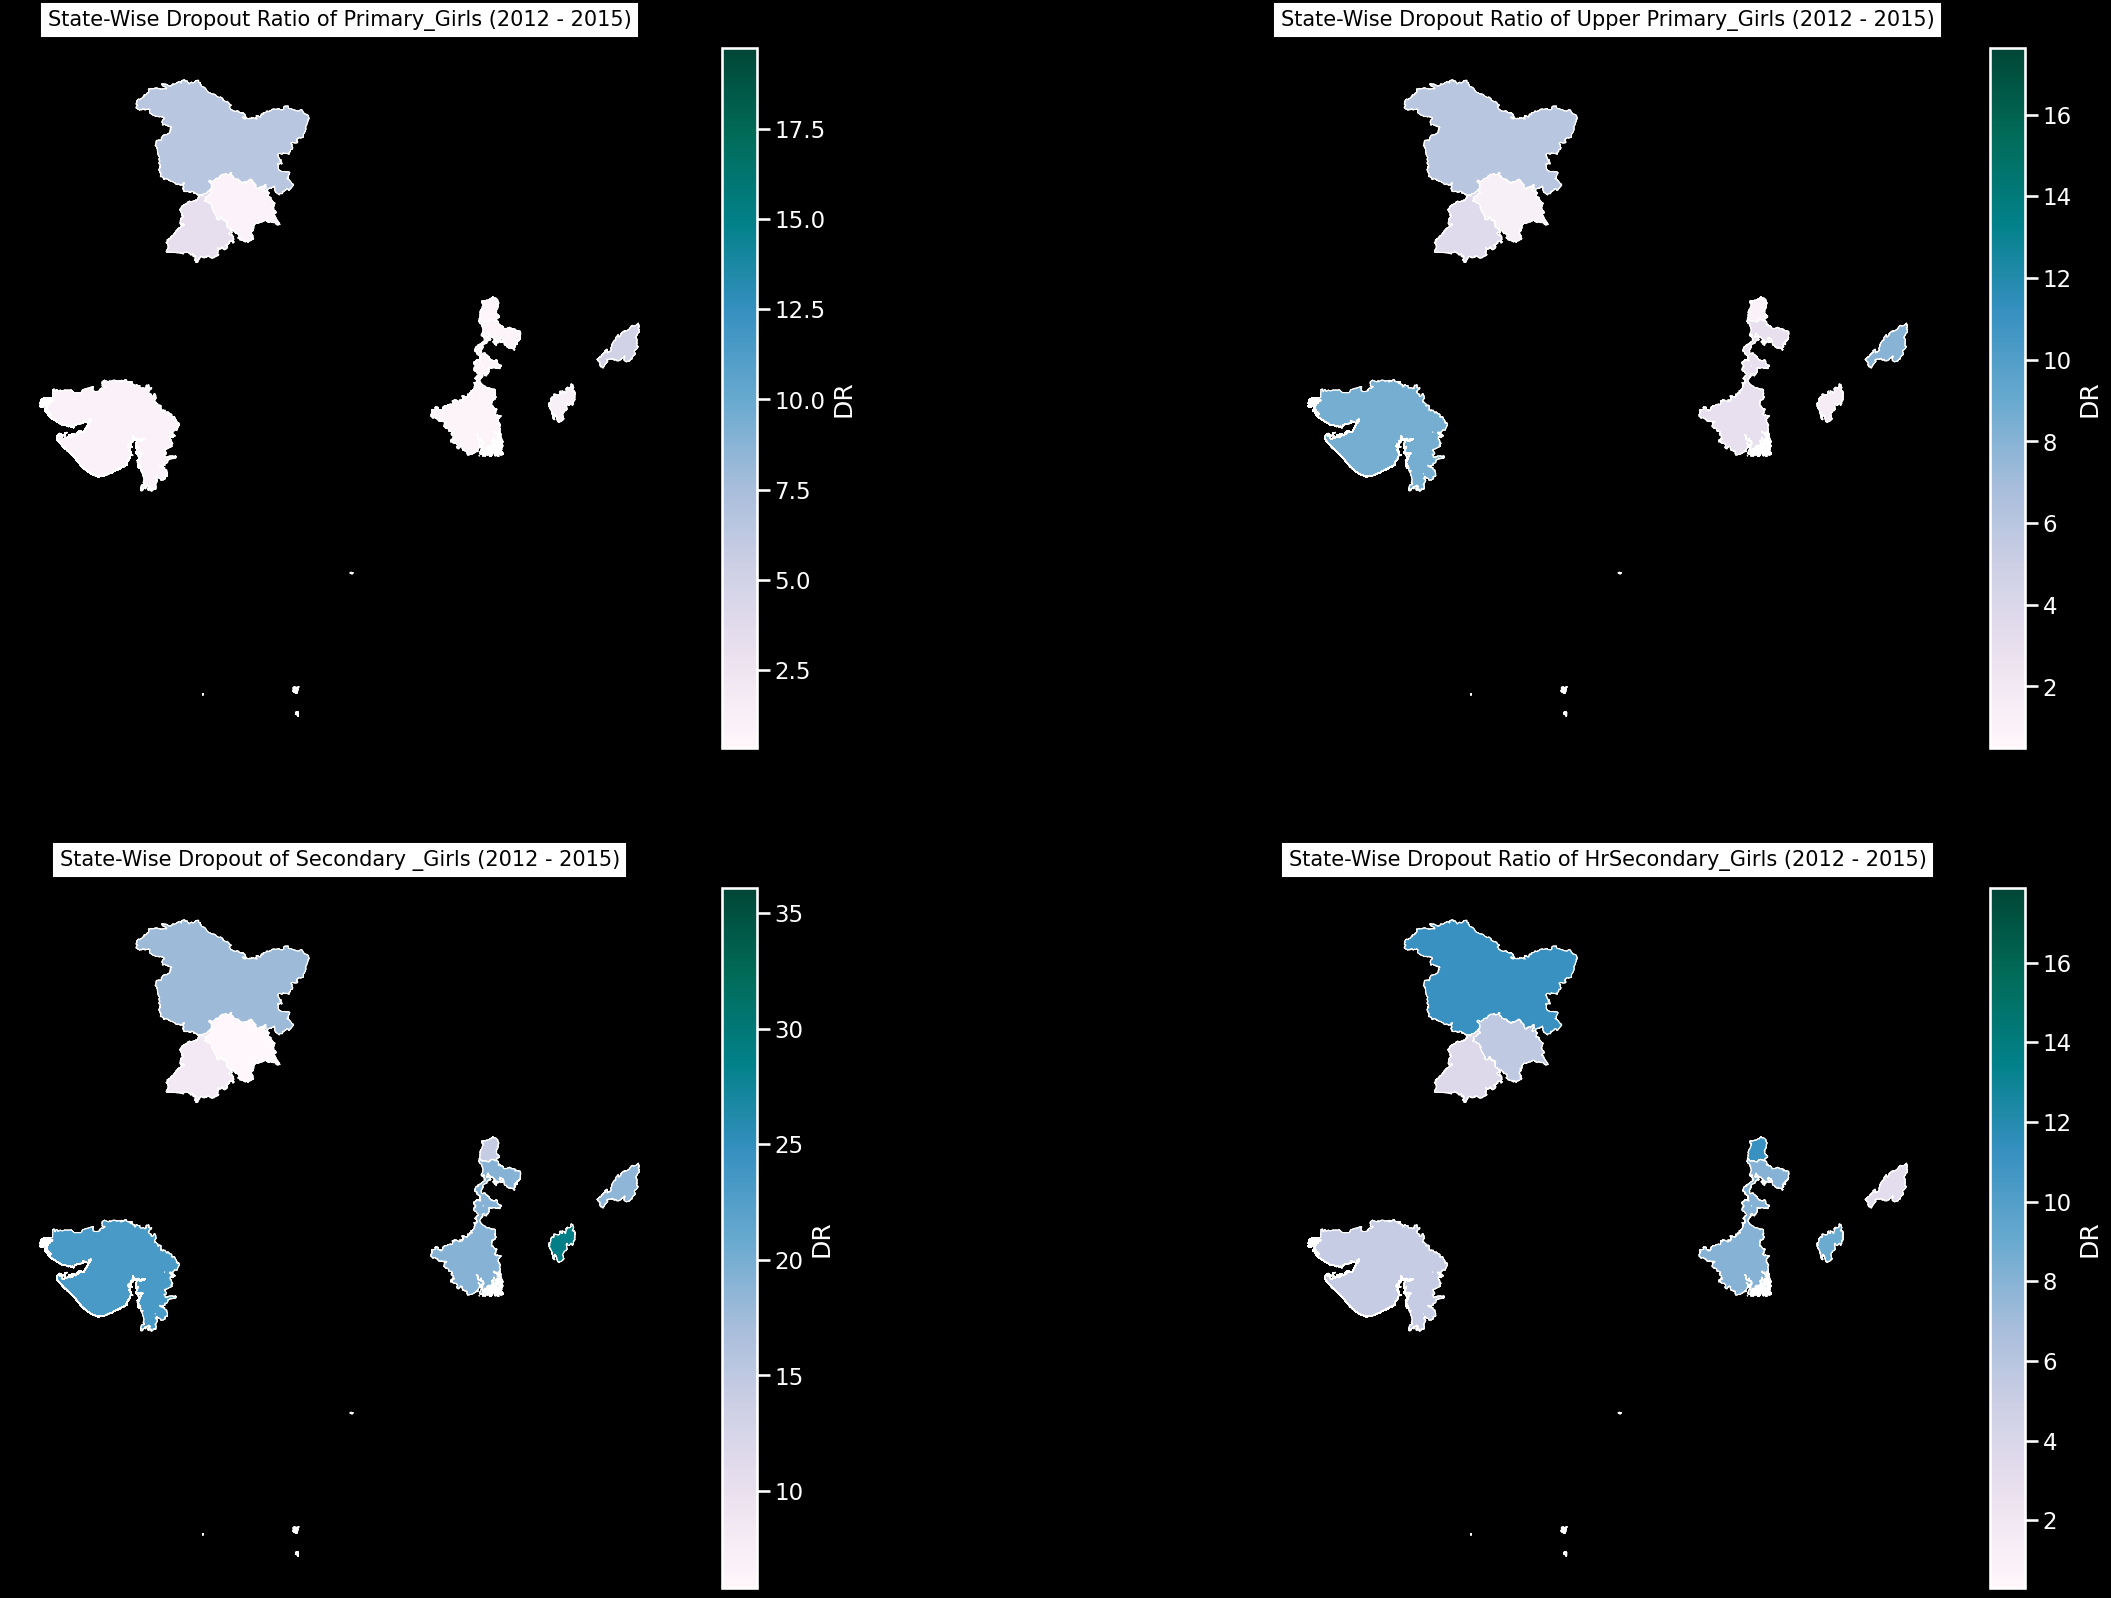

In [ ]:
# State-wise plots of Dropout Ratio for Girls in different grade levels

fig, ax = plt.subplots(2, 2, figsize=(30, 20))
ax[0,0].axis('off')
ax[0,1].axis('off')
ax[1,0].axis('off')
ax[1,1].axis('off')

# some variables which you can play with

fontdict = {'fontsize': '15', 'fontweight' : '3'}
pad = 16
color = 'black'
bbox = dict(facecolor='white', alpha=1.0)

cmap = 'PuBuGn'
linewidth = 0.8
edgecolor = 'white'

ax[0,0].set_title("State-Wise Dropout Ratio of Primary_Girls (2012 - 2015)", fontdict=fontdict,
                  pad = pad, color=color,bbox=bbox)

g1 = merged_girls.plot(column='Primary_Girls_Dropout', cmap=cmap, linewidth=linewidth, 
                  ax=ax[0,0], edgecolor=edgecolor, legend=True,legend_kwds={'label': "DR"})

ax[0,1].set_title("State-Wise Dropout Ratio of Upper Primary_Girls (2012 - 2015)", fontdict=fontdict,
                  pad = pad, color=color,bbox=bbox)

g2 = merged_girls.plot(column='Upper Primary_Girls_Dropout', cmap=cmap, linewidth=linewidth, 
                  ax=ax[0,1], edgecolor=edgecolor, legend=True,legend_kwds={'label': "DR"})

ax[1,0].set_title("State-Wise Dropout of Secondary _Girls (2012 - 2015)", fontdict=fontdict,
                  pad = pad, color=color,bbox=bbox)
g3 = merged_girls.plot(column='Secondary _Girls_Dropout', cmap=cmap, linewidth=linewidth, 
                  ax=ax[1,0], edgecolor=edgecolor, legend=True,legend_kwds={'label': "DR"})

ax[1,1].set_title("State-Wise Dropout Ratio of HrSecondary_Girls (2012 - 2015)", fontdict=fontdict,
                  pad = pad, color=color,bbox=bbox)

g4 = merged_girls.plot(column='HrSecondary_Girls_Dropout', cmap=cmap, linewidth=linewidth, 
                  ax=ax[1,1], edgecolor=edgecolor, legend=True,legend_kwds={'label': "DR"})

- A very low Dropout Ratio in Primary girls is a good sign.
- Gujarat failed to decrease Dropout Ratio in Upper Primary and Secondary Girls. However, Gujarat has the least dropout ratio in Higher Secondary Girls.
- We can see that the dropout ratio keeps on increasing as the grade levels are increasing.

####State-Wise Dropout Ratio Boys

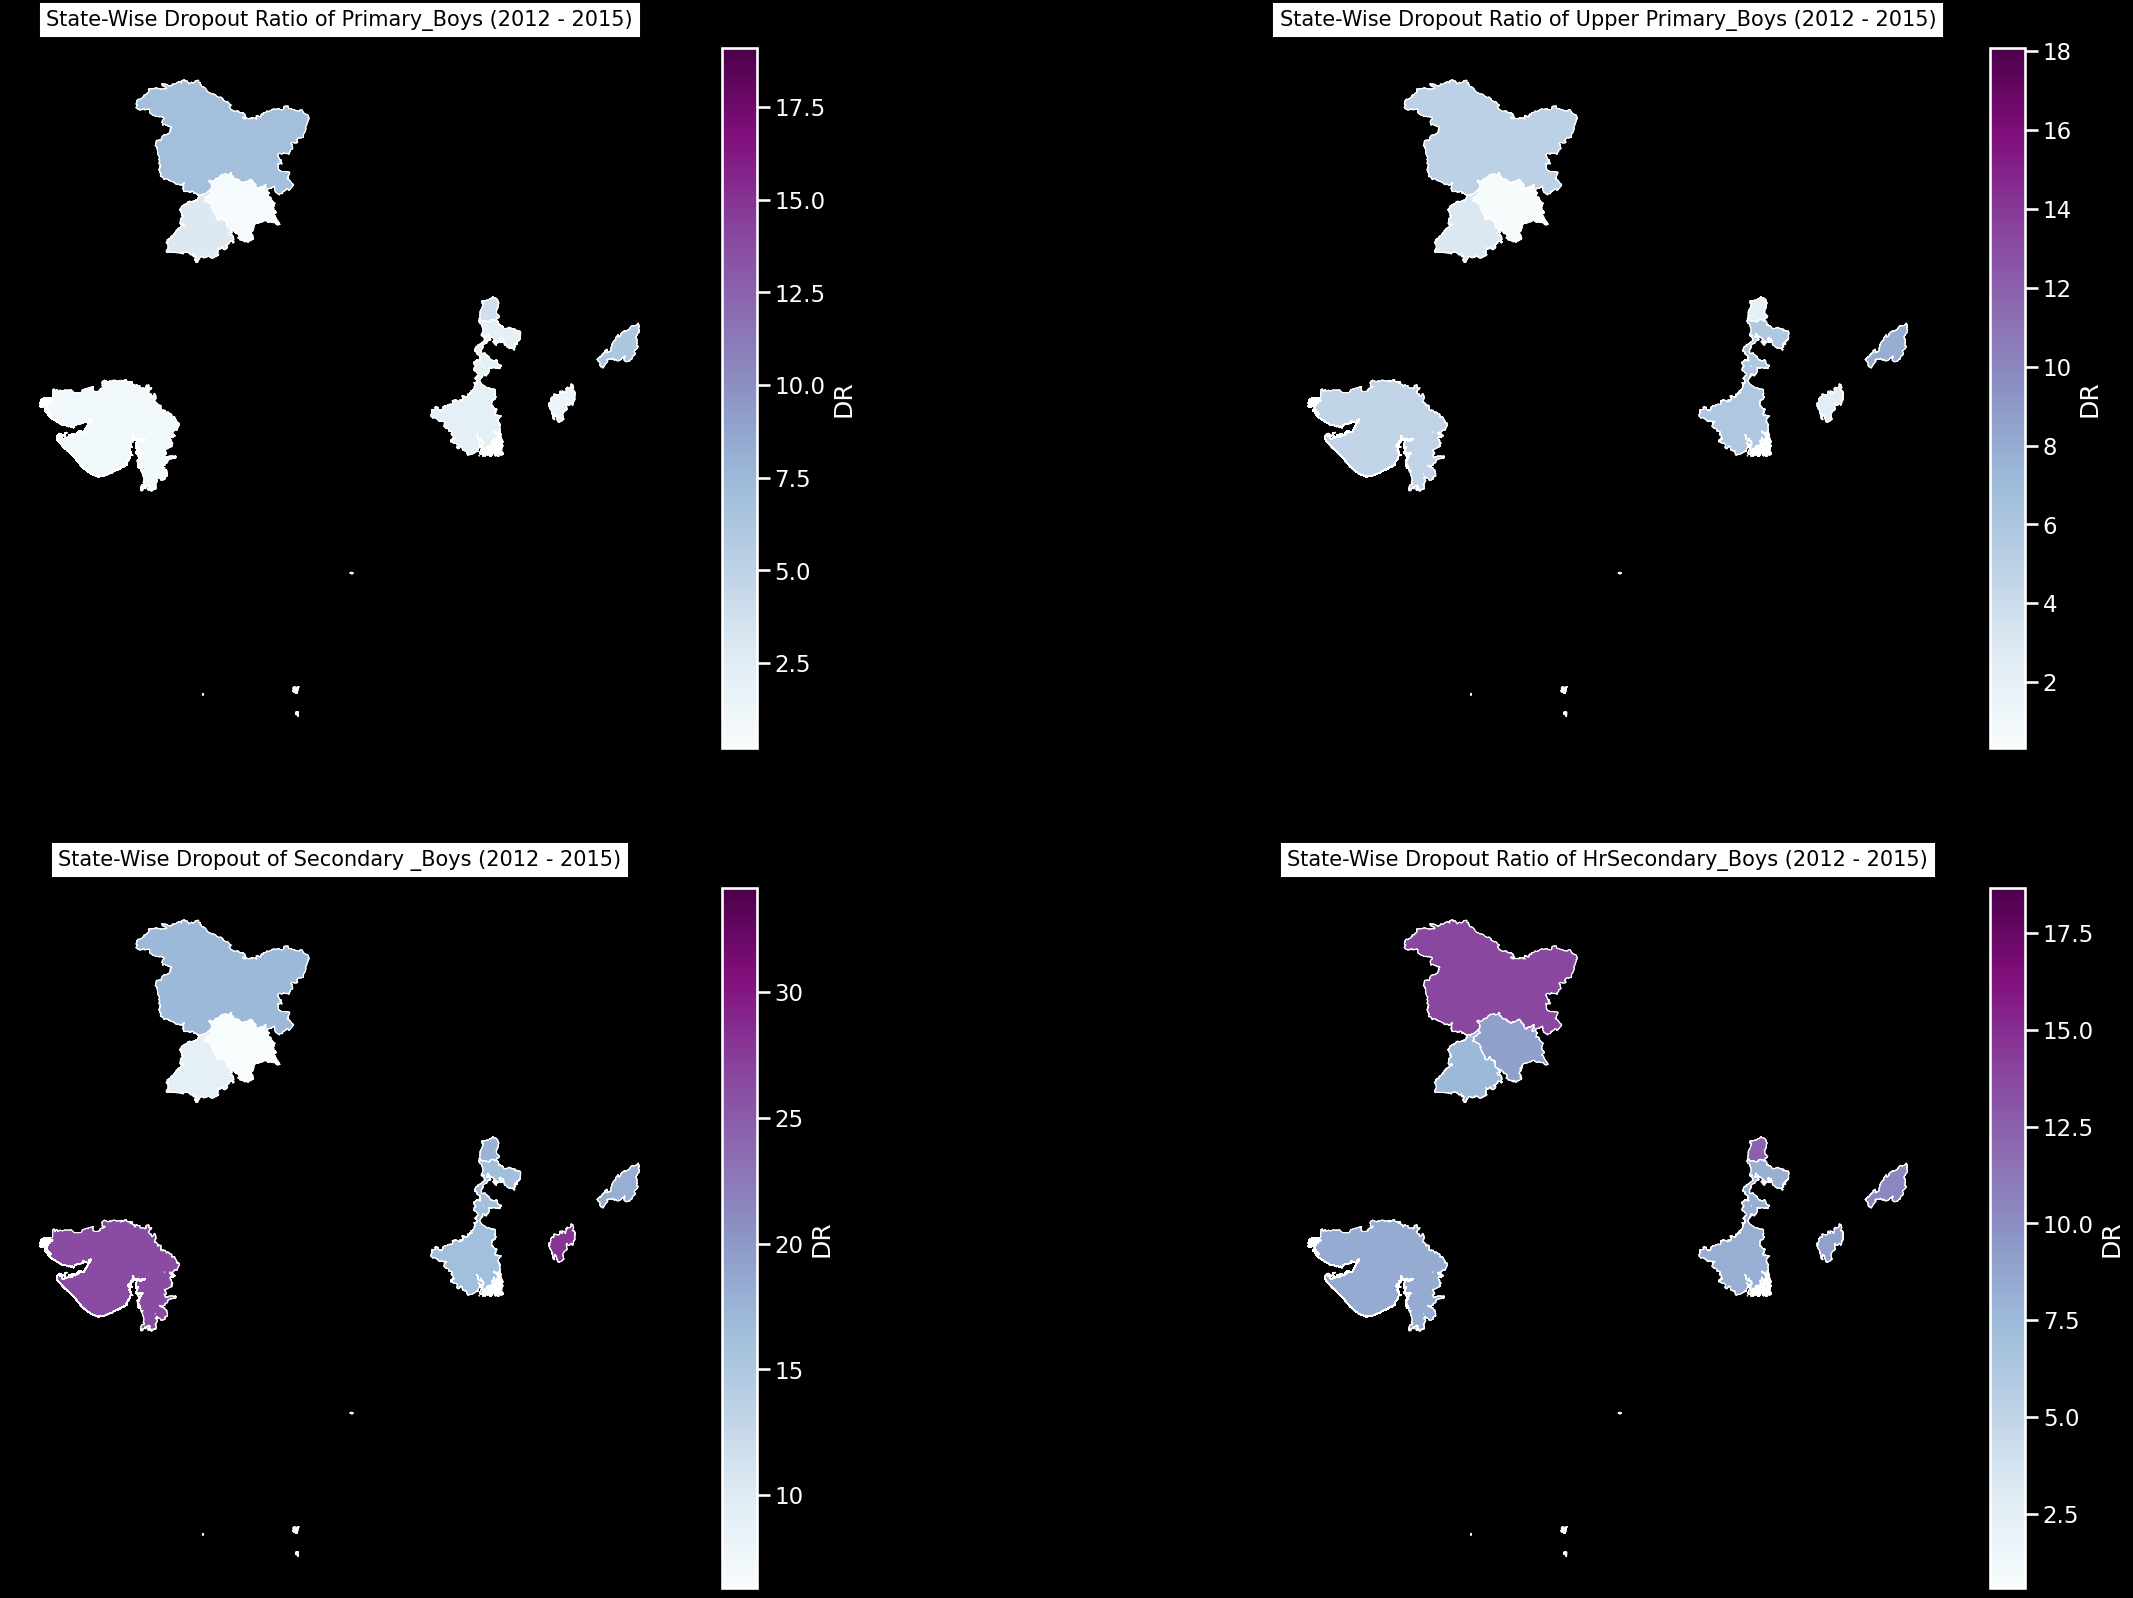

In [ ]:
# State-wise plots of Dropout Ratio for Boys in different grade levels

fig, ax = plt.subplots(2, 2, figsize=(30, 20))
ax[0,0].axis('off')
ax[0,1].axis('off')
ax[1,0].axis('off')
ax[1,1].axis('off')

# some variables which you can play with

fontdict = {'fontsize': '15', 'fontweight' : '3'}
pad = 16
color = 'black'
bbox = dict(facecolor='white', alpha=1.0)

cmap = 'BuPu'
linewidth = 0.8
edgecolor = 'white'

ax[0,0].set_title("State-Wise Dropout Ratio of Primary_Boys (2012 - 2015)", fontdict=fontdict,
                  pad = pad, color=color,bbox=bbox)

b1 = merged_boys.plot(column='Primary_Boys_Dropout', cmap=cmap, linewidth=linewidth, 
                  ax=ax[0,0], edgecolor=edgecolor, legend=True,legend_kwds={'label': "DR"})

ax[0,1].set_title("State-Wise Dropout Ratio of Upper Primary_Boys (2012 - 2015)", fontdict=fontdict,
                  pad = pad, color=color,bbox=bbox)

b2 = merged_boys.plot(column='Upper Primary_Boys_Dropout', cmap=cmap, linewidth=linewidth, 
                  ax=ax[0,1], edgecolor=edgecolor, legend=True,legend_kwds={'label': "DR"})

ax[1,0].set_title("State-Wise Dropout of Secondary _Boys (2012 - 2015)", fontdict=fontdict,
                  pad = pad, color=color,bbox=bbox)
b3 = merged_boys.plot(column='Secondary _Boys_Dropout', cmap=cmap, linewidth=linewidth, 
                  ax=ax[1,0], edgecolor=edgecolor, legend=True,legend_kwds={'label': "DR"})

ax[1,1].set_title("State-Wise Dropout Ratio of HrSecondary_Boys (2012 - 2015)", fontdict=fontdict,
                  pad = pad, color=color,bbox=bbox)

b4 = merged_boys.plot(column='HrSecondary_Boys_Dropout', cmap=cmap, linewidth=linewidth, 
                  ax=ax[1,1], edgecolor=edgecolor, legend=True,legend_kwds={'label': "DR"})

- A very low dropout ratio for Boys in both Primary and Upper Primary grades.
- Gujarat again fails to lower the dropout ratio among boys as well in Secondary grades.
- A same pattern follows for Higher Secondary Boys as Girls.

##Percentage of Facilities

In [ ]:
df_water = pd.read_csv('percentage-of-schools-with-water-facility-2013-2016.csv')
df_comps = pd.read_csv('percentage-of-schools-with-comps-2013-2016.csv')
df_elec = pd.read_csv('percentage-of-schools-with-electricity-2013-2016.csv')
df_g_toilet = pd.read_csv('schools-with-girls-toilet-2013-2016.csv')
df_b_toilet = pd.read_csv('schools-with-boys-toilet-2013-2016.csv')

In [ ]:
# Arrange the `year` column in ascending order
df_water = df_water.sort_values('Year',ascending=True)
df_comps = df_comps.sort_values('year',ascending=True)
df_elec = df_elec.sort_values('year',ascending=True)
df_g_toilet = df_g_toilet.sort_values('year',ascending=True)
df_b_toilet = df_g_toilet.sort_values('year',ascending=True)

# Dataframe for `All India` Gross Enrollment Ratio
water_ai = df_water[df_water['State/UT'] == 'All India'].reset_index(drop=True)
comps_ai = df_comps[df_comps['State_UT'] == 'All India'].reset_index(drop=True)
elec_ai = df_elec[df_elec['State_UT'] == 'All India'].reset_index(drop=True)
gt_ai = df_g_toilet[df_g_toilet['State_UT'] == 'All India'].reset_index(drop=True)
bt_ai = df_b_toilet[df_b_toilet['State_UT'] == 'All India'].reset_index(drop=True)

In [ ]:
water_columns = ['State/UT','Year','Primary_Only','U_Primary_Only','Sec_Only','HrSec_Only']
comps_columns = ['State_UT','year','Primary_Only','U_Primary_Only','Sec_Only','HrSec_Only']
elec_columns = ['State_UT','year','Primary_Only','U_Primary_Only','Sec_Only','HrSec_Only']
gbt_columns = ['State_UT','year','Primary_Only','U_Primary_Only','Sec_Only','HrSec_Only']

In [ ]:
water_ai = water_ai.loc[:,water_columns]
comps_ai = comps_ai.loc[:,comps_columns]
elec_ai = elec_ai.loc[:,elec_columns]
gt_ai = gt_ai.loc[:,gbt_columns]
bt_ai = bt_ai.loc[:,gbt_columns]

In [ ]:
# preparing the dataframe for seaborn plots

tidy_water = pd.melt(water_ai,id_vars=['Year','State/UT']).rename(columns=str.title)
tidy_comps = pd.melt(comps_ai,id_vars=['year','State_UT']).rename(columns=str.title)
tidy_elec = pd.melt(elec_ai,id_vars=['year','State_UT']).rename(columns=str.title)
tidy_gt = pd.melt(gt_ai,id_vars=['year','State_UT']).rename(columns=str.title)
tidy_bt = pd.melt(bt_ai,id_vars=['year','State_UT']).rename(columns=str.title)

<ipython-input-84-2b52e51bd3c3>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


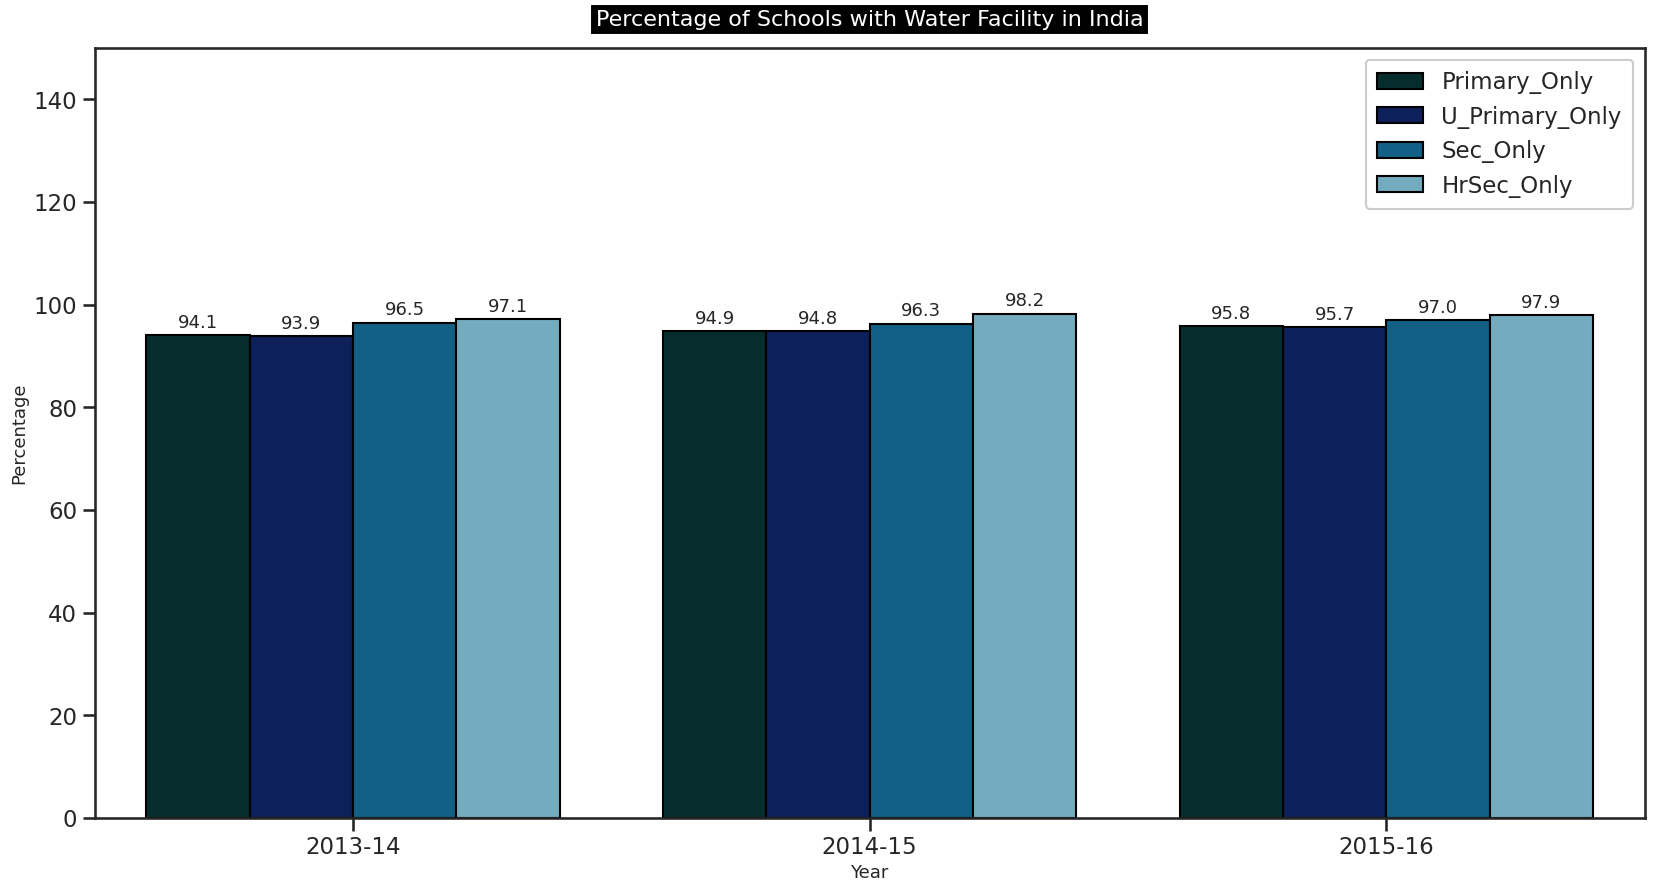

In [ ]:
# setting the plot styles and backgrounds
sns.set(style="ticks",context="talk")
plt.style.use('seaborn-deep')

f, axes = plt.subplots(1, 1, figsize=(20, 10))

# barplot for water facility
water_bplot = sns.barplot(x="Year",y='Value',hue='Variable',data=tidy_water,palette = 'ocean',edgecolor='black',ax=axes)
water_bplot.set(ylim=(0, 150))
for p in water_bplot.patches:
    water_bplot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', fontsize = 13,
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# highlighting the title
axes.set_title('Percentage of Schools with Water Facility in India',size = 16 , pad = 16, color='white',bbox=dict(facecolor='black', alpha=1.0))

axes.set_ylabel('Percentage',size=13)
axes.set_xlabel('Year',size=13)

water_bplot.legend(fancybox=True, framealpha=1, borderpad=0.5)

- There is a consistent increase and nearly 98% of the schools have water facilities for children across India.

<ipython-input-85-32106b0abd03>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


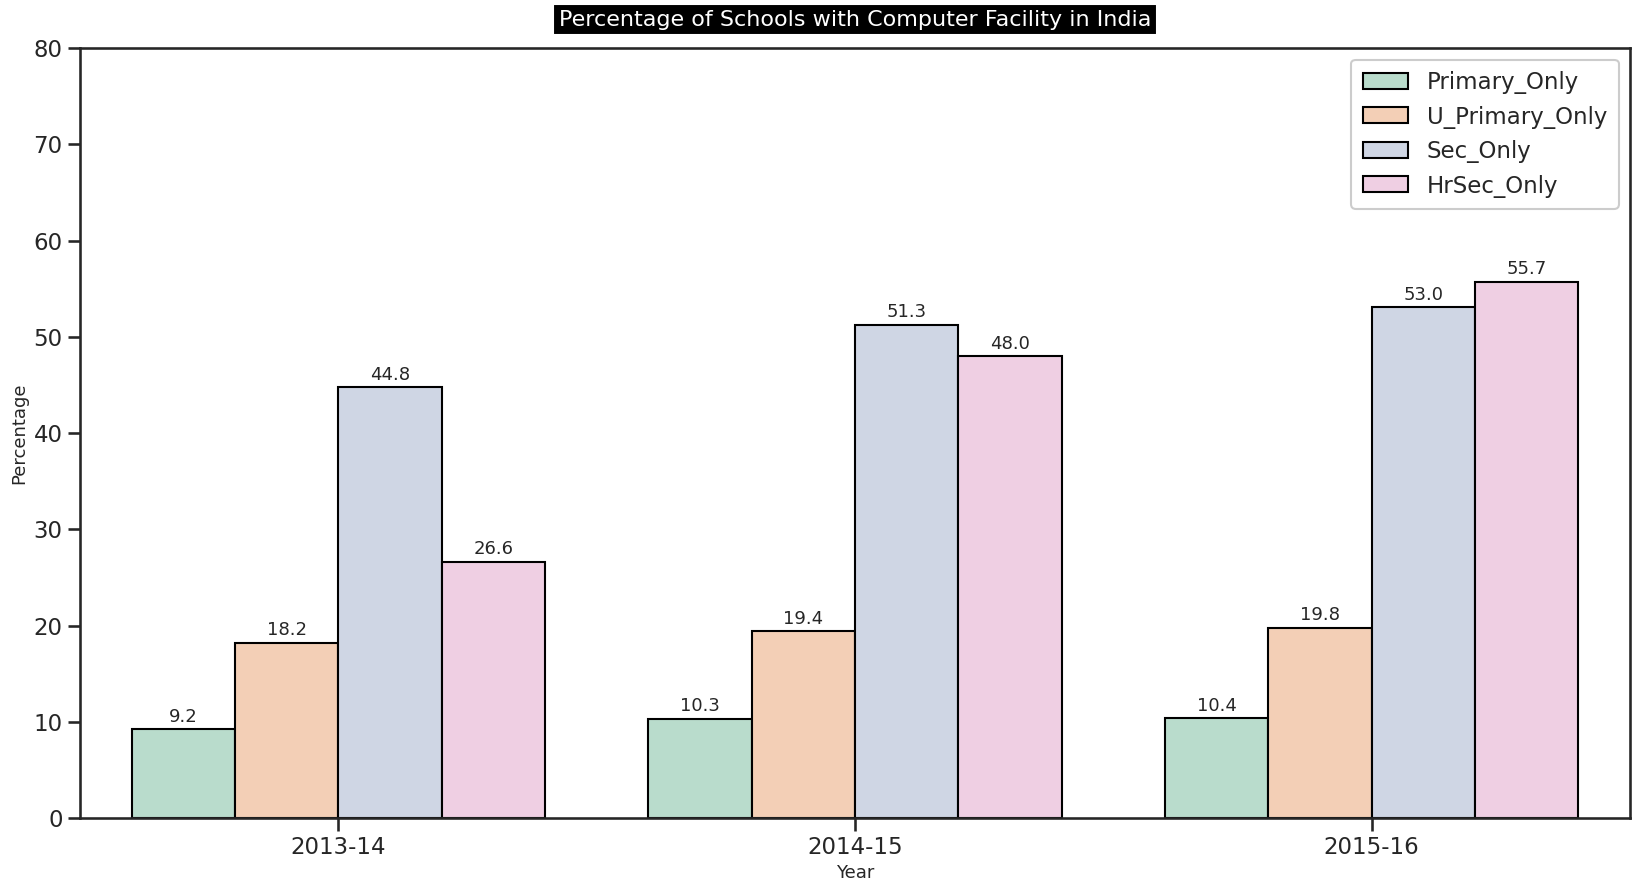

In [ ]:
# setting the plot styles and backgrounds
sns.set(style="ticks",context="talk")
plt.style.use('seaborn-deep')

f, axes = plt.subplots(1, 1, figsize=(20, 10))

# barplot for computer facility
comps_bplot = sns.barplot(x="Year",y='Value',hue='Variable',data=tidy_comps,palette = 'Pastel2',edgecolor='black',ax=axes)
comps_bplot.set(ylim=(0, 80))
for p in comps_bplot.patches:
    comps_bplot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', fontsize = 13,
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# highlighting the title
axes.set_title('Percentage of Schools with Computer Facility in India',size = 16 , pad = 16, color='white',bbox=dict(facecolor='black', alpha=1.0))

axes.set_ylabel('Percentage',size=13)
axes.set_xlabel('Year',size=13)

comps_bplot.legend(fancybox=True, framealpha=1, borderpad=0.5)

- In a world where Artificial Intelligence is taking over and technology keeps progressing by the minute, it's not just a want but a need to get the students up to date with new technology by giving them Computer Facilities starting from Primary Schools.
- Although there is a small increase every year, it's considerably low. I hope Indian Government takes this into account.

<ipython-input-86-1149344ce396>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


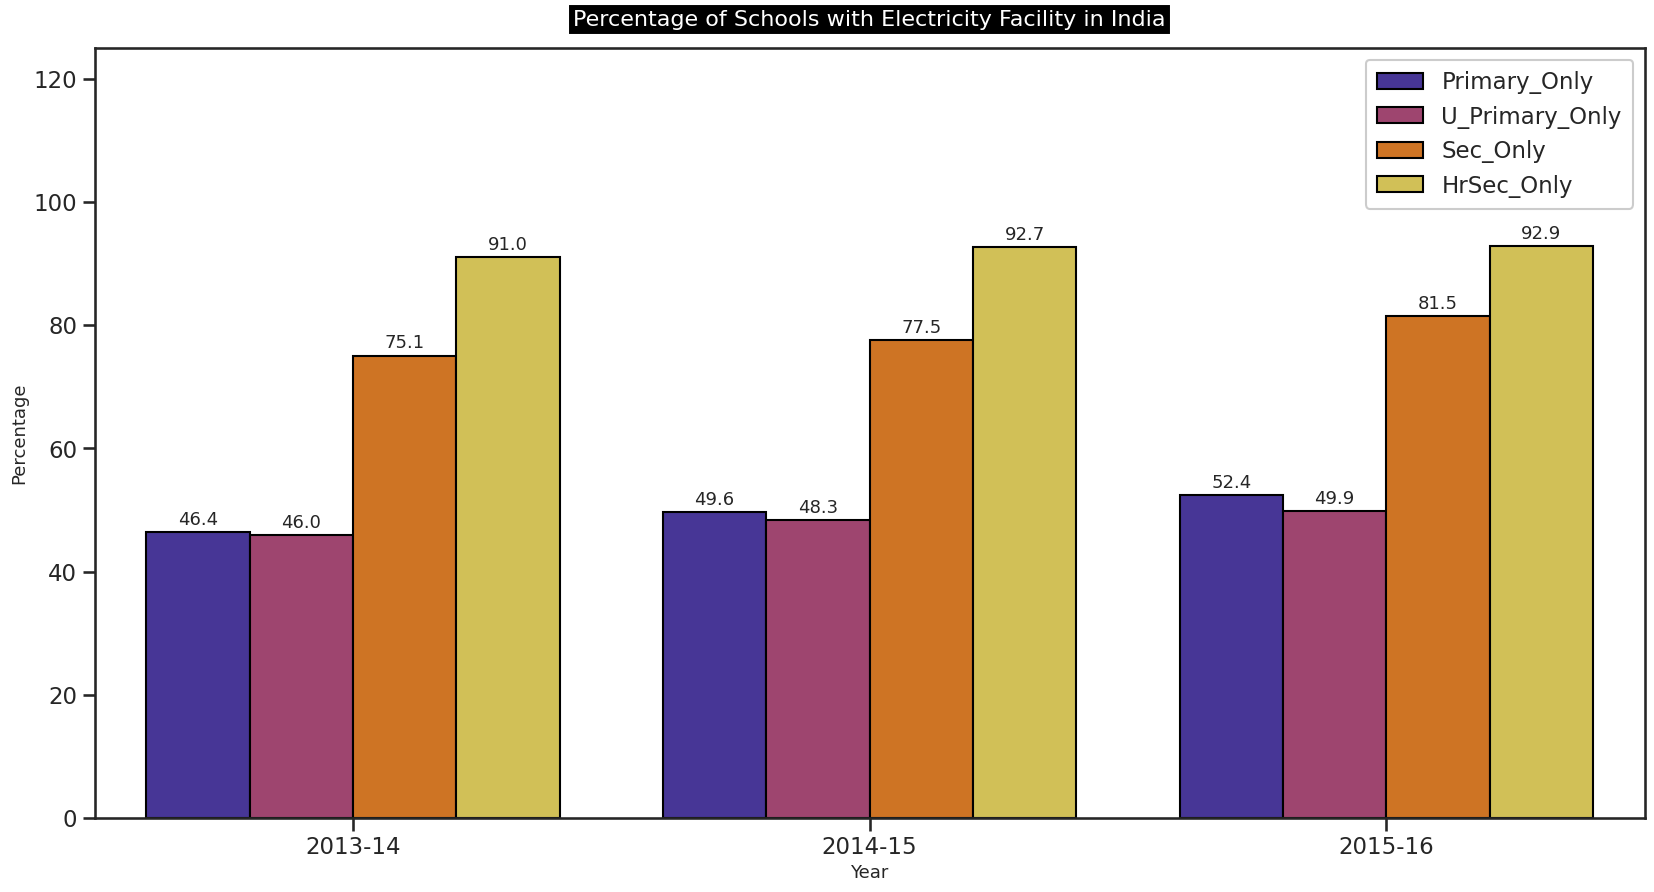

In [ ]:
# setting the plot styles and backgrounds
sns.set(style="ticks",context="talk")
plt.style.use('seaborn-deep')

f, axes = plt.subplots(1, 1, figsize=(20, 10))

# barplot for electricity facility
elec_bplot = sns.barplot(x="Year",y='Value',hue='Variable',data=tidy_elec,palette = 'CMRmap',edgecolor='black',ax=axes)
elec_bplot.set(ylim=(0, 125))
for p in elec_bplot.patches:
    elec_bplot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', fontsize = 13,
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# highlighting the title
axes.set_title('Percentage of Schools with Electricity Facility in India',size = 16 , pad = 16, color='white',bbox=dict(facecolor='black', alpha=1.0))

axes.set_ylabel('Percentage',size=13)
axes.set_xlabel('Year',size=13)

elec_bplot.legend(fancybox=True, framealpha=1, borderpad=0.5)

- Another important need is a consistent rise in Percentage across all Schools.

<ipython-input-87-60a18b802d58>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


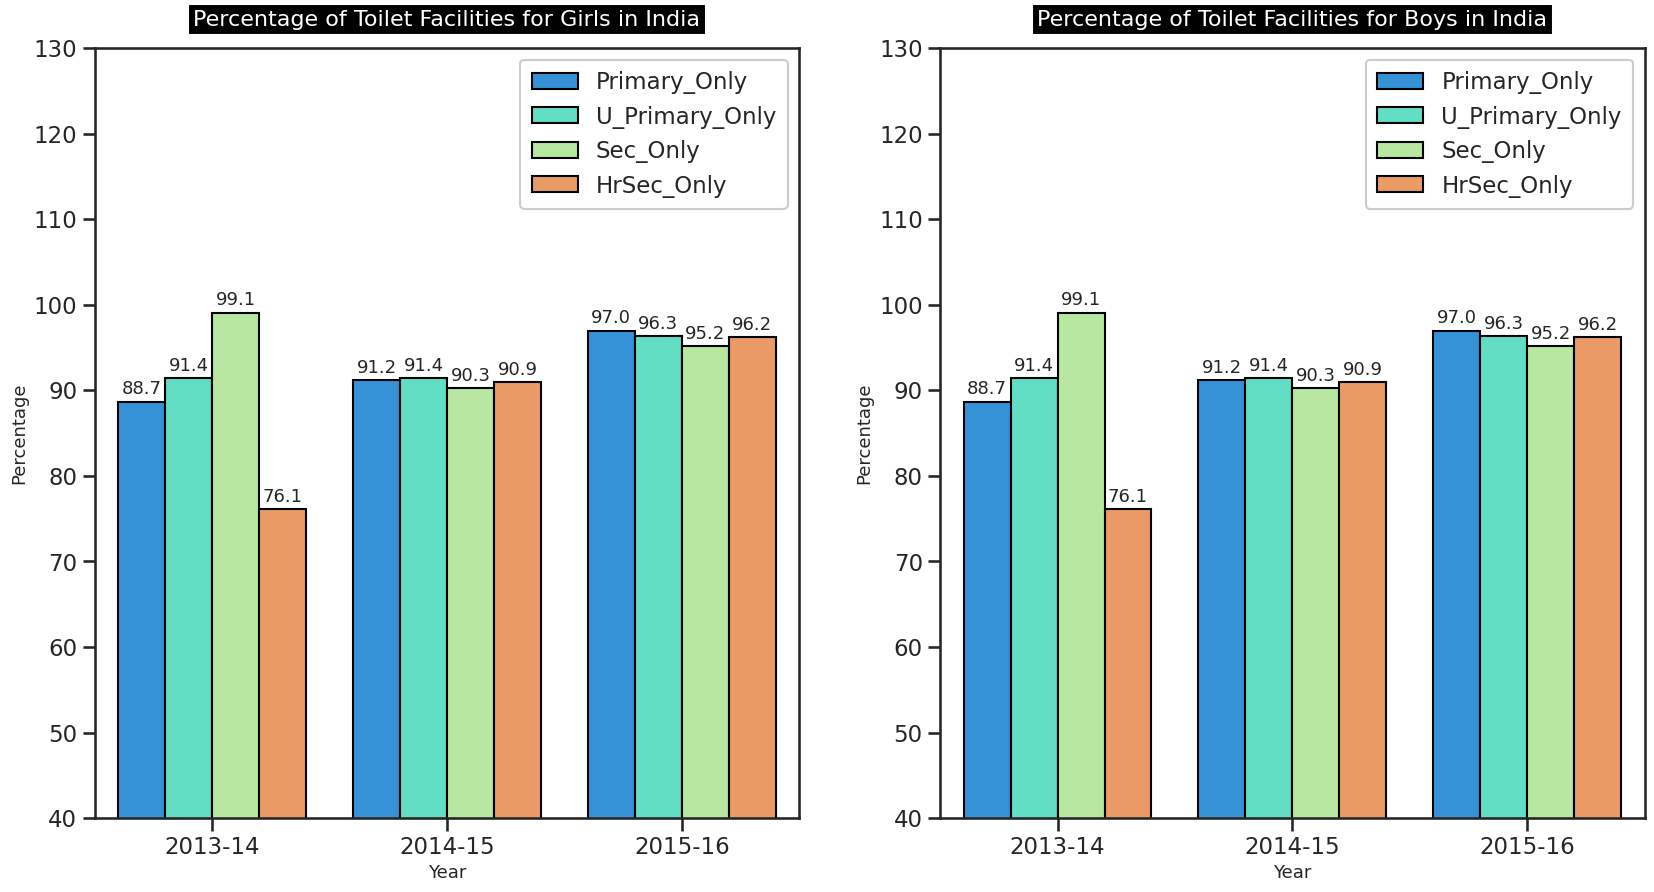

In [ ]:
# setting the plot styles and backgrounds
sns.set(style="ticks",context="talk")
plt.style.use('seaborn-deep')

# creating two subplots: girls and boys
f, axes = plt.subplots(1, 2, figsize=(20, 10))

# -------------------------------------------------------------- #

# barplot for girls
t_girls_bplot = sns.barplot(x="Year",y='Value',hue='Variable',data=tidy_gt,palette='rainbow',edgecolor='black',ax=axes[0])
t_girls_bplot.set(ylim=(40, 130))
for p in t_girls_bplot.patches:
    t_girls_bplot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', fontsize = 13,
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# highlighting the title
axes[0].set_title('Percentage of Toilet Facilities for Girls in India',size = 16 , pad = 16, color='white',bbox=dict(facecolor='black', alpha=1.0))

axes[0].set_ylabel('Percentage',size=13)
axes[0].set_xlabel('Year',size=13)

t_girls_bplot.legend(fancybox=True, framealpha=1, borderpad=0.5)

# ------------------------------------------------------------------- #

# barplot for boys
t_boys_bplot = sns.barplot(x="Year",y='Value',hue='Variable',data=tidy_bt,palette='rainbow',edgecolor='black',ax=axes[1])
t_boys_bplot.set(ylim=(40, 130))
for p in t_boys_bplot.patches:
    t_boys_bplot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', fontsize = 13,
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# highlighting the title
axes[1].set_title('Percentage of Toilet Facilities for Boys in India',size = 16 , pad = 16, color='white',bbox=dict(facecolor='black', alpha=1.0))

axes[1].set_ylabel('Percentage',size=13)
axes[1].set_xlabel('Year',size=13)

t_boys_bplot.legend(fancybox=True, framealpha=1, borderpad=0.5)

- If you notice in 2013-14 school year, the facilities of toilets is really low for Higher Secondary Schools but they have a sudden growth from 2014-2015. 
- Thanks to Indian Government that there are many programs and intiatives undertaken by States and the Centre to ensure people have basic sanitary facilities in every field.

##Conclusion
<h3><b>Gross Enrollment</b></h3>

- GER for Girls:
> Primary School GER has exceeded 100, indicating positive signs.<br><br>
> Consistent decrease over the years, reason unknown.<br><br>
> GER increased from 2013-2016 for Upper Primary, Secondary, and Higher Secondary Schools.<br><br>
> State-wise GER is highest in Eastern states and lowest in Andhra Pradesh and J&K for Primary, Upper Primary, and Secondary schools.<br><br>
> Higher Secondary GER is promising.

- GER for Boys:
> Primary School GER follows similar patterns as Girls.<br><br>
> GER is very low for Upper Primary compared to Girls, especially in J&K.<br><br>
> Boys' GER in Secondary Schools is not alarming.<br><br>
> Higher Secondary GER patterns are similar to Girls.

- All-India General:
> Large difference between Secondary and Higher Secondary enrollments.<br><br>
> Reasons could be migration or enrollment in coaching centers.

- State-wise GER for Boys and Girls:
> Primary and Upper Primary GER follows similar patterns for Boys and Girls.<br><br>
> Secondary Girls' GER is low in J&K, Uttar Pradesh, and Gujarat, which is concerning.<br><br>
> Higher Secondary GER for both genders shows promise with many states having good numbers.

<h3><b>Dropout</b></h3>

- All India:
> High dropout rates observed in Secondary Girls and Boys.<br><br>
> Possible reasons include pressure of board exams or lack of support for further education in rural areas.<br><br>
> Serious issue that requires attention from Indian Government.

- Statewise Girls:
> Low dropout rates in Primary girls.<br><br>
> Gujarat has high dropout rates in Upper Primary and Secondary Girls but low > rates in Higher Secondary Girls.<br><br>
> Dropout rates increase with higher grade levels.

- Statewise Boys:
> Low dropout rates in both Primary and Upper Primary Boys.<br><br>
> Gujarat has high dropout rates in Secondary Boys but low rates in Higher Secondary Boys.<br><br>
> Dropout rate patterns are similar to Girls.

<h3><b>Facilities</b></h3>

- Water: Nearly 98% of schools in India have water facilities.
- Computer: There's a need to provide computer facilities to students starting from primary schools. Although there is a small increase every year, it's considerably low.
- Electricity: There's a consistent rise in the percentage of schools with electricity facilities across all schools in India.
- Toilet: Toilet facilities were low for Higher Secondary Schools in 2013-14, but there has been a sudden growth from 2014-2015, thanks to programs and initiatives undertaken by states and the central government to ensure basic sanitary facilities in all schools.


<h3><b>Measures that can be taken from the Government (From Inferences): </b></h3>

1.   Increase awareness and provide support to rural areas to ensure that girls are encouraged to continue their education after Secondary School.
2.   Provide more resources and support to states with low GER such as Andhra Pradesh and J&K for Primary, Upper Primary, and Secondary schools.
3.   Encourage the use of technology in schools by providing computer facilities starting from Primary schools.
4.   Conduct surveys to understand the reasons for the consistent decrease in GER for both boys and girls over the years and take measures to address the underlying reasons.
5.   Invest in programs and initiatives to ensure basic sanitary facilities in all schools, especially in Higher Secondary Schools where the facilities were low in 2013-14.
6.   Address the issue of high dropout rates in Secondary Schools by identifying the root cause and providing support to students to continue their education after the 10th board exams.
7.   Address the difference between Secondary and Higher Secondary enrollments by providing more options for education and support to students who want to continue their education.


<h3><b>Measures that can be taken from the Government (Generally): </b></h3>

1.   **Increase the number of schools and teachers:** India has a large population, and there is still a shortage of schools and teachers, especially in rural areas. The government can invest in building more schools and hiring more teachers to ensure that every child has access to education.
2.   **Improve the quality of education:** It's not enough to just increase enrollment rates. The quality of education also needs to improve. The government can work on improving the curriculum, training teachers, and providing better resources to schools.
3.   **Address socio-economic issues:** Poverty and other socio-economic issues can prevent children from attending school. The government can work on addressing these issues by providing financial aid and other forms of support to families in need.
4.   **Promote education among girls:** Girls in India are more likely to drop out of school than boys. The government can work on promoting education among girls by offering incentives for families to send their daughters to school, providing safe transportation to schools, and creating awareness about the importance of education for girls.
5.   **Improve infrastructure:** Schools in India often lack basic infrastructure such as buildings, classrooms, and sanitation facilities. The government can invest in improving the infrastructure of schools to provide a safe and comfortable learning environment for children.

